## Navigate to the Correct Directory

The following code navigates to the dataprocessing directory.

In [1]:
cd ../dataprocessing

/Users/carverforbes/internships/google/gunshot-detection/activity-recognition/location/lbs/activity/audioset/dataprocessing


## Call the Import Statements

The following code imports the necessary code to run the code in the rest of this notebook.

In [2]:
# import statements
import audio_processing as ap

import functools
import os
import sys
import datetime
import gc

from absl import logging
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow import feature_column
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import sklearn

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

print("Ran the import statements.")

/Users/carverforbes/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Ran the import statements.


## Feature Extraction
Configure the following parameters to extract the desired features from a specified csv file to a specific destination directory.

In [3]:
# set logging to print logging.INFO logs
logging.set_verbosity(logging.INFO)

In [4]:
# arguments for audio_processing
src_dir = 'example_src_dir'
dest_dir = 'example_dest_dir'
filename = 'gunshot_50_50'
labels = ['Gunshot, gunfire']
available_features = ['chroma_stft',
                       'chroma_cqt',
                       'chroma_cens',
                       'melspectrogram',
                       'mfcc',
                       'rms',
                       'spectral_centroid',
                       'spectral_bandwidth',
                       'spectral_contrast',
                       'spectral_flatness',
                       'spectral_rolloff',
                       'poly_features',
                       'tonnetz',
                       'zero_crossing_rate']
features_to_extract = ['mfcc']
last_features = None
redo = False

In [5]:
def dataframe_to_csv(dataframe, dest_path):
    start_time = datetime.datetime.now()
    stop = dataframe.index.stop
    begin = 0
    end = 100
    count = 0
    while end < stop + 100:
        df = dataframe.iloc[begin:end, :].copy()
        for column in df.columns:
            for i in range(df[column].size):
                i = i + count * 100
                if isinstance(df[column][i], np.ndarray):
                    df[column][i] = df[column][i].tolist()
        if count == 0:
            df.to_csv(dest_path, index=False, header=True)
        else:
            df.to_csv(dest_path, mode='a', index=False, header=True)
        begin += 100
        end += 100
        count += 1
    end_time = datetime.datetime.now()
    function_duration = end_time - start_time
    
        
    print('Created the csv file at the destination path in {} seconds.'.format(
        function_duration))

In [6]:
def csv_to_dataframe(csv_path):
    df = pd.read_csv(csv_path)
    for column in df.columns:
        for i in range(df[column].size):
            if isinstance(df[column][i], str):
                temp = df[column][i][1:-1]
                temp = temp.replace(',', ' ').split(']')
                new_list = []
                for item in temp:
                    if item == '':
                        continue
                    item = item.replace('[', '').strip().split()
                    item = [float(num) for num in item]
                    arr = np.array(item)
                    new_list.append(arr)
                new_arr = np.array(new_list)
                df[column][i] = new_arr
    return df

In [7]:
# Import the dataset as a pandas DataFrame object.
features = '_'.join(features_to_extract)
csv_path = os.path.join(dest_dir, filename + '_' + features + '.csv')
features_changed = last_features is None or features_to_extract != last_features
last_features = features_to_extract
df = ap.output_df(src_dir, dest_dir, filename, labels, features_to_extract, redo)

INFO:absl:The set has 13420 examples
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:a

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:(99, 26.239405)
INFO:absl:extracted features
INFO:absl:(100, 26.390819)
INFO:absl:extracted features
INFO:absl:(101, 26.532708)
INFO:absl:extracted features
INFO:absl:(102, 26.687568)
INFO:absl:extracted features
INFO:absl:(103, 26.842214)
INFO:absl:extracted features
INFO:absl:(104, 26.994392)
INFO:absl:extracted features
INFO:absl:(105, 27.138788)
INFO:absl:extracted features
INFO:absl:(106, 27.291006)
INFO:absl:extracted features
INFO:absl:(107, 27.441564)
INFO:absl:extracted features
INFO:absl:(108, 27.584556)
INFO:absl:extracted features
INFO:absl:(109, 27.721264)
INFO:absl:extracted features
INFO:absl:(110, 27.863925)
INFO:absl:extracted features
INFO:absl:(111, 28.015241)
INFO:absl:extracted features
INFO:absl:(112, 28.145586)
INFO:absl:extracted features
INFO:absl:(113, 28.291177)
INFO:absl:extracted features
INFO:absl:(114, 28.435025)
INFO:absl:extracted features
INFO:absl:(115, 28.579019)
INFO:absl:extracted features
INFO:absl:(116, 28.706132)
INFO:absl:extracted fe

INFO:absl:(246, 46.832292)
INFO:absl:extracted features
INFO:absl:(247, 46.954524)
INFO:absl:extracted features
INFO:absl:(248, 47.098048)
INFO:absl:extracted features
INFO:absl:(249, 47.241878)
INFO:absl:extracted features
INFO:absl:(250, 47.37551)
INFO:absl:extracted features
INFO:absl:(251, 47.518897)
INFO:absl:extracted features
INFO:absl:(252, 47.66639)
INFO:absl:extracted features
INFO:absl:(253, 47.810995)
INFO:absl:extracted features
INFO:absl:(254, 47.954136)
INFO:absl:extracted features
INFO:absl:(255, 48.088209)
INFO:absl:extracted features
INFO:absl:(256, 48.221596)
INFO:absl:extracted features
INFO:absl:(257, 48.355662)
INFO:absl:extracted features
INFO:absl:(258, 48.529055)
INFO:absl:extracted features
INFO:absl:(259, 48.673065)
INFO:absl:extracted features
INFO:absl:(260, 48.807047)
INFO:absl:extracted features
INFO:absl:(261, 48.95106)
INFO:absl:extracted features
INFO:absl:(262, 49.094302)
INFO:absl:extracted features
INFO:absl:(263, 49.227755)
INFO:absl:extracted feat

INFO:absl:(393, 67.148222)
INFO:absl:extracted features
INFO:absl:(394, 67.272235)
INFO:absl:extracted features
INFO:absl:(395, 67.418277)
INFO:absl:extracted features
INFO:absl:(396, 67.563803)
INFO:absl:extracted features
INFO:absl:(397, 67.702857)
INFO:absl:extracted features
INFO:absl:(398, 67.843071)
INFO:absl:extracted features
INFO:absl:(399, 67.973057)
INFO:absl:extracted features
INFO:absl:(400, 68.116312)
INFO:absl:extracted features
INFO:absl:(401, 68.259658)
INFO:absl:extracted features
INFO:absl:(402, 68.402715)
INFO:absl:extracted features
INFO:absl:(403, 68.546935)
INFO:absl:extracted features
INFO:absl:(404, 68.690727)
INFO:absl:extracted features
INFO:absl:(405, 68.824427)
INFO:absl:extracted features
INFO:absl:(406, 68.955012)
INFO:absl:extracted features
INFO:absl:(407, 69.089555)
INFO:absl:extracted features
INFO:absl:(408, 69.223468)
INFO:absl:extracted features
INFO:absl:(409, 69.357283)
INFO:absl:extracted features
INFO:absl:(410, 69.501884)
INFO:absl:extracted f

INFO:absl:(540, 87.812033)
INFO:absl:extracted features
INFO:absl:(541, 87.958025)
INFO:absl:extracted features
INFO:absl:(542, 88.092193)
INFO:absl:extracted features
INFO:absl:(543, 88.226057)
INFO:absl:extracted features
INFO:absl:(544, 88.36994)
INFO:absl:extracted features
INFO:absl:(545, 88.513785)
INFO:absl:extracted features
INFO:absl:(546, 88.656801)
INFO:absl:extracted features
INFO:absl:(547, 88.790059)
INFO:absl:extracted features
INFO:absl:(548, 88.923473)
INFO:absl:extracted features
INFO:absl:(549, 89.057195)
INFO:absl:extracted features
INFO:absl:(550, 89.20097)
INFO:absl:extracted features
INFO:absl:(551, 89.344645)
INFO:absl:extracted features
INFO:absl:(552, 89.488996)
INFO:absl:extracted features
INFO:absl:(553, 89.632816)
INFO:absl:extracted features
INFO:absl:(554, 89.776582)
INFO:absl:extracted features
INFO:absl:(555, 89.911652)
INFO:absl:extracted features
INFO:absl:(556, 90.055352)
INFO:absl:extracted features
INFO:absl:(557, 90.199248)
INFO:absl:extracted fea

INFO:absl:(686, 108.936135)
INFO:absl:extracted features
INFO:absl:(687, 109.083994)
INFO:absl:extracted features
INFO:absl:(688, 109.23241)
INFO:absl:extracted features
INFO:absl:(689, 109.370027)
INFO:absl:extracted features
INFO:absl:(690, 109.516761)
INFO:absl:extracted features
INFO:absl:(691, 109.649003)
INFO:absl:extracted features
INFO:absl:(692, 109.786909)
INFO:absl:extracted features
INFO:absl:(693, 109.930601)
INFO:absl:extracted features
INFO:absl:(694, 110.067367)
INFO:absl:extracted features
INFO:absl:(695, 110.212307)
INFO:absl:extracted features
INFO:absl:(696, 110.357482)
INFO:absl:extracted features
INFO:absl:(697, 110.510728)
INFO:absl:extracted features
INFO:absl:(698, 110.674368)
INFO:absl:extracted features
INFO:absl:(699, 110.828756)
INFO:absl:extracted features
INFO:absl:(700, 110.987578)
INFO:absl:extracted features
INFO:absl:(701, 111.125115)
INFO:absl:extracted features
INFO:absl:(702, 111.268096)
INFO:absl:extracted features
INFO:absl:(703, 111.413047)
INFO

INFO:absl:(830, 129.427234)
INFO:absl:extracted features
INFO:absl:(831, 129.568362)
INFO:absl:extracted features
INFO:absl:(832, 129.712341)
INFO:absl:extracted features
INFO:absl:(833, 129.856429)
INFO:absl:extracted features
INFO:absl:(834, 130.001317)
INFO:absl:extracted features
INFO:absl:(835, 130.145946)
INFO:absl:extracted features
INFO:absl:(836, 130.283367)
INFO:absl:extracted features
INFO:absl:(837, 130.421613)
INFO:absl:extracted features
INFO:absl:(838, 130.566578)
INFO:absl:extracted features
INFO:absl:(839, 130.710851)
INFO:absl:extracted features
INFO:absl:(840, 130.848969)
INFO:absl:extracted features
INFO:absl:(841, 130.985349)
INFO:absl:extracted features
INFO:absl:(842, 131.123083)
INFO:absl:extracted features
INFO:absl:(843, 131.267429)
INFO:absl:extracted features
INFO:absl:(844, 131.412899)
INFO:absl:extracted features
INFO:absl:(845, 131.557909)
INFO:absl:extracted features
INFO:absl:(846, 131.70436)
INFO:absl:extracted features
INFO:absl:(847, 131.848453)
INFO

INFO:absl:extracted features
INFO:absl:(975, 149.689292)
INFO:absl:extracted features
INFO:absl:(976, 149.827657)
INFO:absl:extracted features
INFO:absl:(977, 149.972878)
INFO:absl:extracted features
INFO:absl:(978, 150.115401)
INFO:absl:extracted features
INFO:absl:(979, 150.258315)
INFO:absl:extracted features
INFO:absl:(980, 150.433278)
INFO:absl:extracted features
INFO:absl:(981, 150.558346)
INFO:absl:extracted features
INFO:absl:(982, 150.700912)
INFO:absl:extracted features
INFO:absl:(983, 150.844315)
ERROR:absl:Input signal length=0 is too small to resample from 48000->22050
INFO:absl:(984, 150.847435)
INFO:absl:extracted features
INFO:absl:(985, 150.992698)
INFO:absl:extracted features
INFO:absl:(986, 151.135039)
INFO:absl:extracted features
INFO:absl:(987, 151.268179)
INFO:absl:extracted features
INFO:absl:(988, 151.410696)
INFO:absl:extracted features
INFO:absl:(989, 151.54363)
INFO:absl:extracted features
INFO:absl:(990, 151.677124)
INFO:absl:extracted features
INFO:absl:(99

INFO:absl:(1116, 169.15849)
INFO:absl:extracted features
INFO:absl:(1117, 169.285555)
INFO:absl:extracted features
INFO:absl:(1118, 169.418537)
INFO:absl:extracted features
INFO:absl:(1119, 169.551952)
INFO:absl:extracted features
INFO:absl:(1120, 169.696886)
INFO:absl:extracted features
INFO:absl:(1121, 169.830446)
INFO:absl:extracted features
INFO:absl:(1122, 169.963832)
INFO:absl:extracted features
INFO:absl:(1123, 170.097225)
INFO:absl:extracted features
INFO:absl:(1124, 170.241388)
INFO:absl:extracted features
INFO:absl:(1125, 170.384512)
INFO:absl:extracted features
INFO:absl:(1126, 170.528366)
INFO:absl:extracted features
INFO:absl:(1127, 170.659599)
INFO:absl:extracted features
INFO:absl:(1128, 170.801351)
INFO:absl:extracted features
INFO:absl:(1129, 170.944282)
INFO:absl:extracted features
INFO:absl:(1130, 171.087377)
INFO:absl:extracted features
INFO:absl:(1131, 171.215692)
INFO:absl:extracted features
INFO:absl:(1132, 171.360868)
INFO:absl:extracted features
INFO:absl:(1133

INFO:absl:(1258, 188.792745)
INFO:absl:extracted features
INFO:absl:(1259, 188.935375)
INFO:absl:extracted features
INFO:absl:(1260, 189.069033)
INFO:absl:extracted features
INFO:absl:(1261, 189.202211)
INFO:absl:extracted features
INFO:absl:(1262, 189.336442)
INFO:absl:extracted features
INFO:absl:(1263, 189.479733)
INFO:absl:extracted features
INFO:absl:(1264, 189.612795)
INFO:absl:extracted features
INFO:absl:(1265, 189.746489)
INFO:absl:extracted features
INFO:absl:(1266, 189.880698)
INFO:absl:extracted features
INFO:absl:(1267, 190.014109)
INFO:absl:extracted features
INFO:absl:(1268, 190.148181)
INFO:absl:extracted features
INFO:absl:(1269, 190.28211)
INFO:absl:extracted features
INFO:absl:(1270, 190.42527)
INFO:absl:extracted features
INFO:absl:(1271, 190.558762)
INFO:absl:extracted features
INFO:absl:(1272, 190.701899)
INFO:absl:extracted features
INFO:absl:(1273, 190.844881)
INFO:absl:extracted features
INFO:absl:(1274, 190.978186)
INFO:absl:extracted features
INFO:absl:(1275,

INFO:absl:(1400, 208.449236)
INFO:absl:extracted features
INFO:absl:(1401, 208.59482)
INFO:absl:extracted features
INFO:absl:(1402, 208.737194)
INFO:absl:extracted features
INFO:absl:(1403, 208.882588)
INFO:absl:extracted features
INFO:absl:(1404, 208.988586)
INFO:absl:extracted features
INFO:absl:(1405, 209.129099)
INFO:absl:extracted features
INFO:absl:(1406, 209.277133)
INFO:absl:extracted features
INFO:absl:(1407, 209.40782)
INFO:absl:extracted features
INFO:absl:(1408, 209.554849)
INFO:absl:extracted features
INFO:absl:(1409, 209.689612)
INFO:absl:extracted features
INFO:absl:(1410, 209.832771)
INFO:absl:extracted features
INFO:absl:(1411, 209.975847)
INFO:absl:extracted features
INFO:absl:(1412, 210.109493)
INFO:absl:extracted features
INFO:absl:(1413, 210.252471)
INFO:absl:extracted features
INFO:absl:(1414, 210.386273)
INFO:absl:extracted features
INFO:absl:(1415, 210.52897)
INFO:absl:extracted features
INFO:absl:(1416, 210.671888)
INFO:absl:extracted features
INFO:absl:(1417, 

INFO:absl:(1542, 228.090659)
INFO:absl:extracted features
INFO:absl:(1543, 228.228493)
INFO:absl:extracted features
INFO:absl:(1544, 228.373456)
INFO:absl:extracted features
INFO:absl:(1545, 228.497852)
INFO:absl:extracted features
INFO:absl:(1546, 228.640934)
INFO:absl:extracted features
INFO:absl:(1547, 228.784271)
INFO:absl:extracted features
INFO:absl:(1548, 228.932753)
INFO:absl:extracted features
INFO:absl:(1549, 229.069511)
INFO:absl:extracted features
INFO:absl:(1550, 229.212644)
INFO:absl:extracted features
INFO:absl:(1551, 229.356033)
INFO:absl:extracted features
INFO:absl:(1552, 229.501809)
INFO:absl:extracted features
INFO:absl:(1553, 229.646723)
INFO:absl:extracted features
INFO:absl:(1554, 229.792811)
INFO:absl:extracted features
INFO:absl:(1555, 229.935877)
INFO:absl:extracted features
INFO:absl:(1556, 230.080717)
INFO:absl:extracted features
INFO:absl:(1557, 230.226953)
INFO:absl:extracted features
INFO:absl:(1558, 230.372735)
INFO:absl:extracted features
INFO:absl:(155

INFO:absl:(1684, 247.882952)
INFO:absl:extracted features
INFO:absl:(1685, 248.026569)
INFO:absl:extracted features
INFO:absl:(1686, 248.169664)
INFO:absl:extracted features
INFO:absl:(1687, 248.303469)
INFO:absl:extracted features
INFO:absl:(1688, 248.445741)
INFO:absl:extracted features
INFO:absl:(1689, 248.591115)
INFO:absl:extracted features
INFO:absl:(1690, 248.735964)
INFO:absl:extracted features
INFO:absl:(1691, 248.882851)
INFO:absl:extracted features
INFO:absl:(1692, 249.029536)
INFO:absl:extracted features
INFO:absl:(1693, 249.163177)
INFO:absl:extracted features
INFO:absl:(1694, 249.273608)
INFO:absl:extracted features
INFO:absl:(1695, 249.40831)
INFO:absl:extracted features
INFO:absl:(1696, 249.55137)
INFO:absl:extracted features
INFO:absl:(1697, 249.706004)
INFO:absl:extracted features
INFO:absl:(1698, 249.850122)
INFO:absl:extracted features
INFO:absl:(1699, 249.993702)
INFO:absl:extracted features
INFO:absl:(1700, 250.123429)
INFO:absl:extracted features
INFO:absl:(1701,

INFO:absl:extracted features
INFO:absl:(1826, 267.709255)
INFO:absl:extracted features
INFO:absl:(1827, 267.843141)
INFO:absl:extracted features
INFO:absl:(1828, 267.967634)
INFO:absl:extracted features
INFO:absl:(1829, 268.11148)
INFO:absl:extracted features
INFO:absl:(1830, 268.245042)
INFO:absl:extracted features
INFO:absl:(1831, 268.378382)
INFO:absl:extracted features
INFO:absl:(1832, 268.515494)
INFO:absl:extracted features
INFO:absl:(1833, 268.658622)
INFO:absl:extracted features
INFO:absl:(1834, 268.794419)
INFO:absl:extracted features
INFO:absl:(1835, 268.937924)
INFO:absl:extracted features
INFO:absl:(1836, 269.071328)
INFO:absl:extracted features
INFO:absl:(1837, 269.21461)
INFO:absl:extracted features
INFO:absl:(1838, 269.339954)
INFO:absl:extracted features
INFO:absl:(1839, 269.47321)
INFO:absl:extracted features
INFO:absl:(1840, 269.616894)
INFO:absl:extracted features
INFO:absl:(1841, 269.760672)
INFO:absl:extracted features
INFO:absl:(1842, 269.894498)
INFO:absl:extract

INFO:absl:(1967, 287.380913)
INFO:absl:extracted features
INFO:absl:(1968, 287.514941)
INFO:absl:extracted features
INFO:absl:(1969, 287.658481)
INFO:absl:extracted features
INFO:absl:(1970, 287.792341)
INFO:absl:extracted features
INFO:absl:(1971, 287.926303)
INFO:absl:extracted features
INFO:absl:(1972, 288.069054)
INFO:absl:extracted features
INFO:absl:(1973, 288.212285)
INFO:absl:extracted features
INFO:absl:(1974, 288.356517)
INFO:absl:extracted features
INFO:absl:(1975, 288.489888)
INFO:absl:extracted features
INFO:absl:(1976, 288.632712)
INFO:absl:extracted features
INFO:absl:(1977, 288.766615)
INFO:absl:extracted features
INFO:absl:(1978, 288.909214)
INFO:absl:extracted features
INFO:absl:(1979, 289.052771)
INFO:absl:extracted features
INFO:absl:(1980, 289.195787)
INFO:absl:extracted features
INFO:absl:(1981, 289.338317)
INFO:absl:extracted features
INFO:absl:(1982, 289.481557)
INFO:absl:extracted features
INFO:absl:(1983, 289.614741)
INFO:absl:extracted features
INFO:absl:(198

INFO:absl:extracted features
INFO:absl:(2109, 307.058069)
INFO:absl:extracted features
INFO:absl:(2110, 307.200703)
INFO:absl:extracted features
INFO:absl:(2111, 307.333864)
INFO:absl:extracted features
INFO:absl:(2112, 307.468975)
INFO:absl:extracted features
INFO:absl:(2113, 307.612369)
INFO:absl:extracted features
INFO:absl:(2114, 307.745703)
INFO:absl:extracted features
INFO:absl:(2115, 307.88871)
INFO:absl:extracted features
INFO:absl:(2116, 308.022125)
INFO:absl:extracted features
INFO:absl:(2117, 308.155709)
INFO:absl:extracted features
INFO:absl:(2118, 308.286769)
INFO:absl:extracted features
INFO:absl:(2119, 308.421331)
INFO:absl:extracted features
INFO:absl:(2120, 308.564388)
INFO:absl:extracted features
INFO:absl:(2121, 308.706497)
INFO:absl:extracted features
INFO:absl:(2122, 308.84904)
INFO:absl:extracted features
INFO:absl:(2123, 308.982492)
INFO:absl:extracted features
INFO:absl:(2124, 309.125475)
INFO:absl:extracted features
INFO:absl:(2125, 309.268991)
INFO:absl:extrac

INFO:absl:(2250, 326.385742)
INFO:absl:extracted features
INFO:absl:(2251, 326.529066)
INFO:absl:extracted features
INFO:absl:(2252, 326.663456)
INFO:absl:extracted features
INFO:absl:(2253, 326.807381)
INFO:absl:extracted features
INFO:absl:(2254, 326.950486)
INFO:absl:extracted features
INFO:absl:(2255, 327.083411)
INFO:absl:extracted features
INFO:absl:(2256, 327.227145)
INFO:absl:extracted features
INFO:absl:(2257, 327.369693)
INFO:absl:extracted features
INFO:absl:(2258, 327.502983)
INFO:absl:extracted features
INFO:absl:(2259, 327.647759)
INFO:absl:extracted features
INFO:absl:(2260, 327.791392)
INFO:absl:extracted features
INFO:absl:(2261, 327.934306)
INFO:absl:extracted features
INFO:absl:(2262, 328.077641)
INFO:absl:extracted features
INFO:absl:(2263, 328.221969)
INFO:absl:extracted features
INFO:absl:(2264, 328.35517)
INFO:absl:extracted features
INFO:absl:(2265, 328.498223)
INFO:absl:extracted features
INFO:absl:(2266, 328.641494)
INFO:absl:extracted features
INFO:absl:(2267

INFO:absl:(2391, 345.96124)
INFO:absl:extracted features
INFO:absl:(2392, 346.09492)
INFO:absl:extracted features
INFO:absl:(2393, 346.237648)
INFO:absl:extracted features
INFO:absl:(2394, 346.373584)
INFO:absl:extracted features
INFO:absl:(2395, 346.507243)
INFO:absl:extracted features
INFO:absl:(2396, 346.640827)
INFO:absl:extracted features
INFO:absl:(2397, 346.774169)
INFO:absl:extracted features
INFO:absl:(2398, 346.907881)
INFO:absl:extracted features
INFO:absl:(2399, 347.050914)
INFO:absl:extracted features
INFO:absl:(2400, 347.194229)
INFO:absl:extracted features
INFO:absl:(2401, 347.337216)
INFO:absl:extracted features
INFO:absl:(2402, 347.45856)
INFO:absl:extracted features
INFO:absl:(2403, 347.591199)
INFO:absl:extracted features
INFO:absl:(2404, 347.726528)
INFO:absl:extracted features
INFO:absl:(2405, 347.860591)
INFO:absl:extracted features
INFO:absl:(2406, 348.003298)
INFO:absl:extracted features
INFO:absl:(2407, 348.136699)
INFO:absl:extracted features
INFO:absl:(2408, 

INFO:absl:(2533, 365.592137)
INFO:absl:extracted features
INFO:absl:(2534, 365.735963)
INFO:absl:extracted features
INFO:absl:(2535, 365.87949)
INFO:absl:extracted features
INFO:absl:(2536, 366.022889)
INFO:absl:extracted features
INFO:absl:(2537, 366.157099)
INFO:absl:extracted features
INFO:absl:(2538, 366.290596)
INFO:absl:extracted features
INFO:absl:(2539, 366.424369)
INFO:absl:extracted features
INFO:absl:(2540, 366.567891)
INFO:absl:extracted features
INFO:absl:(2541, 366.701979)
INFO:absl:extracted features
INFO:absl:(2542, 366.846174)
INFO:absl:extracted features
INFO:absl:(2543, 366.989408)
INFO:absl:extracted features
INFO:absl:(2544, 367.132601)
INFO:absl:extracted features
INFO:absl:(2545, 367.266524)
INFO:absl:extracted features
INFO:absl:(2546, 367.410787)
INFO:absl:extracted features
INFO:absl:(2547, 367.537617)
INFO:absl:extracted features
INFO:absl:(2548, 367.670497)
INFO:absl:extracted features
INFO:absl:(2549, 367.803895)
INFO:absl:extracted features
INFO:absl:(2550

INFO:absl:(2675, 385.298706)
INFO:absl:extracted features
INFO:absl:(2676, 385.442224)
INFO:absl:extracted features
INFO:absl:(2677, 385.576182)
INFO:absl:extracted features
INFO:absl:(2678, 385.718838)
INFO:absl:extracted features
INFO:absl:(2679, 385.862014)
INFO:absl:extracted features
INFO:absl:(2680, 385.983928)
INFO:absl:extracted features
INFO:absl:(2681, 386.128144)
INFO:absl:extracted features
INFO:absl:(2682, 386.253959)
INFO:absl:extracted features
INFO:absl:(2683, 386.400207)
INFO:absl:extracted features
INFO:absl:(2684, 386.546157)
INFO:absl:extracted features
INFO:absl:(2685, 386.689835)
INFO:absl:extracted features
INFO:absl:(2686, 386.835418)
INFO:absl:extracted features
INFO:absl:(2687, 386.969645)
INFO:absl:extracted features
INFO:absl:(2688, 387.113294)
INFO:absl:extracted features
INFO:absl:(2689, 387.256221)
INFO:absl:extracted features
INFO:absl:(2690, 387.389439)
INFO:absl:extracted features
INFO:absl:(2691, 387.532363)
INFO:absl:extracted features
INFO:absl:(269

INFO:absl:(2817, 404.836838)
INFO:absl:extracted features
INFO:absl:(2818, 404.969896)
INFO:absl:extracted features
INFO:absl:(2819, 405.1032)
INFO:absl:extracted features
INFO:absl:(2820, 405.246091)
INFO:absl:extracted features
INFO:absl:(2821, 405.392059)
INFO:absl:extracted features
INFO:absl:(2822, 405.524988)
INFO:absl:extracted features
INFO:absl:(2823, 405.658514)
INFO:absl:extracted features
INFO:absl:(2824, 405.785476)
INFO:absl:extracted features
INFO:absl:(2825, 405.928556)
INFO:absl:extracted features
INFO:absl:(2826, 406.058037)
INFO:absl:extracted features
INFO:absl:(2827, 406.125208)
INFO:absl:extracted features
INFO:absl:(2828, 406.270778)
INFO:absl:extracted features
INFO:absl:(2829, 406.41868)
INFO:absl:extracted features
INFO:absl:(2830, 406.552742)
INFO:absl:extracted features
INFO:absl:(2831, 406.69833)
INFO:absl:extracted features
INFO:absl:(2832, 406.831696)
INFO:absl:extracted features
INFO:absl:(2833, 406.974775)
INFO:absl:extracted features
INFO:absl:(2834, 4

INFO:absl:(2959, 424.727636)
INFO:absl:extracted features
INFO:absl:(2960, 424.88056)
INFO:absl:extracted features
INFO:absl:(2961, 425.027519)
INFO:absl:extracted features
INFO:absl:(2962, 425.163356)
INFO:absl:extracted features
INFO:absl:(2963, 425.302653)
INFO:absl:extracted features
INFO:absl:(2964, 425.433567)
INFO:absl:extracted features
INFO:absl:(2965, 425.575651)
INFO:absl:extracted features
INFO:absl:(2966, 425.726468)
INFO:absl:extracted features
INFO:absl:(2967, 425.873843)
INFO:absl:extracted features
INFO:absl:(2968, 426.023419)
INFO:absl:extracted features
INFO:absl:(2969, 426.160214)
INFO:absl:extracted features
INFO:absl:(2970, 426.305492)
INFO:absl:extracted features
INFO:absl:(2971, 426.450717)
INFO:absl:extracted features
INFO:absl:(2972, 426.597918)
INFO:absl:extracted features
INFO:absl:(2973, 426.734297)
INFO:absl:extracted features
INFO:absl:(2974, 426.879348)
INFO:absl:extracted features
INFO:absl:(2975, 427.015171)
INFO:absl:extracted features
INFO:absl:(2976

INFO:absl:extracted features
INFO:absl:(3101, 444.694877)
INFO:absl:extracted features
INFO:absl:(3102, 444.841427)
INFO:absl:extracted features
INFO:absl:(3103, 444.977786)
INFO:absl:extracted features
INFO:absl:(3104, 445.113325)
INFO:absl:extracted features
INFO:absl:(3105, 445.261378)
INFO:absl:extracted features
INFO:absl:(3106, 445.407128)
INFO:absl:extracted features
INFO:absl:(3107, 445.552465)
INFO:absl:extracted features
INFO:absl:(3108, 445.685423)
INFO:absl:extracted features
INFO:absl:(3109, 445.820939)
INFO:absl:extracted features
INFO:absl:(3110, 445.951971)
INFO:absl:extracted features
INFO:absl:(3111, 446.088656)
INFO:absl:extracted features
INFO:absl:(3112, 446.233604)
INFO:absl:extracted features
INFO:absl:(3113, 446.368502)
INFO:absl:extracted features
INFO:absl:(3114, 446.513872)
INFO:absl:extracted features
INFO:absl:(3115, 446.659344)
INFO:absl:extracted features
INFO:absl:(3116, 446.795828)
INFO:absl:extracted features
INFO:absl:(3117, 446.94139)
INFO:absl:extra

INFO:absl:(3242, 464.172351)
INFO:absl:extracted features
INFO:absl:(3243, 464.316564)
INFO:absl:extracted features
INFO:absl:(3244, 464.459732)
INFO:absl:extracted features
INFO:absl:(3245, 464.593317)
INFO:absl:extracted features
INFO:absl:(3246, 464.726438)
INFO:absl:extracted features
INFO:absl:(3247, 464.860696)
INFO:absl:extracted features
INFO:absl:(3248, 465.00387)
INFO:absl:extracted features
INFO:absl:(3249, 465.146395)
INFO:absl:extracted features
INFO:absl:(3250, 465.289846)
INFO:absl:extracted features
INFO:absl:(3251, 465.454999)
INFO:absl:extracted features
INFO:absl:(3252, 465.598006)
INFO:absl:extracted features
INFO:absl:(3253, 465.741183)
INFO:absl:extracted features
INFO:absl:(3254, 465.874563)
INFO:absl:extracted features
INFO:absl:(3255, 466.01796)
INFO:absl:extracted features
INFO:absl:(3256, 466.153149)
INFO:absl:extracted features
INFO:absl:(3257, 466.283836)
INFO:absl:extracted features
INFO:absl:(3258, 466.430211)
INFO:absl:extracted features
INFO:absl:(3259,

INFO:absl:extracted features
INFO:absl:(3384, 483.868657)
INFO:absl:extracted features
INFO:absl:(3385, 484.012673)
INFO:absl:extracted features
INFO:absl:(3386, 484.156531)
INFO:absl:extracted features
INFO:absl:(3387, 484.296901)
INFO:absl:extracted features
INFO:absl:(3388, 484.44094)
INFO:absl:extracted features
INFO:absl:(3389, 484.583974)
INFO:absl:extracted features
INFO:absl:(3390, 484.726605)
INFO:absl:extracted features
INFO:absl:(3391, 484.870261)
INFO:absl:extracted features
INFO:absl:(3392, 485.015705)
INFO:absl:extracted features
INFO:absl:(3393, 485.159769)
INFO:absl:extracted features
INFO:absl:(3394, 485.292991)
INFO:absl:extracted features
INFO:absl:(3395, 485.436597)
INFO:absl:extracted features
INFO:absl:(3396, 485.580876)
INFO:absl:extracted features
INFO:absl:(3397, 485.72418)
INFO:absl:extracted features
INFO:absl:(3398, 485.857938)
INFO:absl:extracted features
INFO:absl:(3399, 486.001702)
INFO:absl:extracted features
INFO:absl:(3400, 486.146495)
INFO:absl:extrac

INFO:absl:extracted features
INFO:absl:(3526, 503.538397)
INFO:absl:extracted features
INFO:absl:(3527, 503.667102)
INFO:absl:extracted features
INFO:absl:(3528, 503.810018)
INFO:absl:extracted features
INFO:absl:(3529, 503.953378)
INFO:absl:extracted features
INFO:absl:(3530, 504.096901)
INFO:absl:extracted features
INFO:absl:(3531, 504.240443)
INFO:absl:extracted features
INFO:absl:(3532, 504.38432)
INFO:absl:extracted features
INFO:absl:(3533, 504.517678)
INFO:absl:extracted features
INFO:absl:(3534, 504.661696)
INFO:absl:extracted features
INFO:absl:(3535, 504.787219)
INFO:absl:extracted features
INFO:absl:(3536, 504.931289)
INFO:absl:extracted features
INFO:absl:(3537, 505.065477)
INFO:absl:extracted features
INFO:absl:(3538, 505.208889)
INFO:absl:extracted features
INFO:absl:(3539, 505.35217)
INFO:absl:extracted features
INFO:absl:(3540, 505.495933)
INFO:absl:extracted features
INFO:absl:(3541, 505.63948)
INFO:absl:extracted features
INFO:absl:(3542, 505.782904)
INFO:absl:extract

INFO:absl:extracted features
INFO:absl:(3668, 523.290864)
INFO:absl:extracted features
INFO:absl:(3669, 523.434398)
INFO:absl:extracted features
INFO:absl:(3670, 523.577948)
INFO:absl:extracted features
INFO:absl:(3671, 523.722164)
INFO:absl:extracted features
INFO:absl:(3672, 523.855259)
INFO:absl:extracted features
INFO:absl:(3673, 523.991845)
INFO:absl:extracted features
INFO:absl:(3674, 524.134892)
INFO:absl:extracted features
INFO:absl:(3675, 524.269002)
INFO:absl:extracted features
INFO:absl:(3676, 524.404635)
INFO:absl:extracted features
INFO:absl:(3677, 524.548408)
INFO:absl:extracted features
INFO:absl:(3678, 524.691892)
INFO:absl:extracted features
INFO:absl:(3679, 524.83536)
INFO:absl:extracted features
INFO:absl:(3680, 524.969116)
INFO:absl:extracted features
INFO:absl:(3681, 525.111495)
INFO:absl:extracted features
INFO:absl:(3682, 525.245119)
INFO:absl:extracted features
INFO:absl:(3683, 525.388843)
INFO:absl:extracted features
INFO:absl:(3684, 525.514092)
INFO:absl:extra

INFO:absl:extracted features
INFO:absl:(3810, 543.104921)
INFO:absl:extracted features
INFO:absl:(3811, 543.260707)
INFO:absl:extracted features
INFO:absl:(3812, 543.40632)
INFO:absl:extracted features
INFO:absl:(3813, 543.541966)
INFO:absl:extracted features
INFO:absl:(3814, 543.669253)
INFO:absl:extracted features
INFO:absl:(3815, 543.816614)
INFO:absl:extracted features
INFO:absl:(3816, 543.952657)
INFO:absl:extracted features
INFO:absl:(3817, 544.09956)
INFO:absl:extracted features
INFO:absl:(3818, 544.24552)
INFO:absl:extracted features
INFO:absl:(3819, 544.392258)
INFO:absl:extracted features
INFO:absl:(3820, 544.539287)
INFO:absl:extracted features
INFO:absl:(3821, 544.675858)
INFO:absl:extracted features
INFO:absl:(3822, 544.822227)
INFO:absl:extracted features
INFO:absl:(3823, 544.950777)
INFO:absl:extracted features
INFO:absl:(3824, 545.096704)
INFO:absl:extracted features
INFO:absl:(3825, 545.234597)
INFO:absl:extracted features
INFO:absl:(3826, 545.370171)
INFO:absl:extract

INFO:absl:extracted features
INFO:absl:(3952, 563.141868)
INFO:absl:extracted features
INFO:absl:(3953, 563.278505)
INFO:absl:extracted features
INFO:absl:(3954, 563.424855)
INFO:absl:extracted features
INFO:absl:(3955, 563.561071)
INFO:absl:extracted features
INFO:absl:(3956, 563.709599)
INFO:absl:extracted features
INFO:absl:(3957, 563.836812)
INFO:absl:extracted features
INFO:absl:(3958, 563.983381)
INFO:absl:extracted features
INFO:absl:(3959, 564.128844)
INFO:absl:extracted features
INFO:absl:(3960, 564.275439)
INFO:absl:extracted features
INFO:absl:(3961, 564.411645)
INFO:absl:extracted features
INFO:absl:(3962, 564.55791)
INFO:absl:extracted features
INFO:absl:(3963, 564.695084)
INFO:absl:extracted features
INFO:absl:(3964, 564.843414)
INFO:absl:extracted features
INFO:absl:(3965, 564.989409)
INFO:absl:extracted features
INFO:absl:(3966, 565.134836)
INFO:absl:extracted features
INFO:absl:(3967, 565.280881)
INFO:absl:extracted features
INFO:absl:(3968, 565.42111)
INFO:absl:extrac

INFO:absl:extracted features
INFO:absl:(4094, 583.451651)
INFO:absl:extracted features
INFO:absl:(4095, 583.597469)
INFO:absl:extracted features
INFO:absl:(4096, 583.746293)
INFO:absl:extracted features
INFO:absl:(4097, 583.893849)
INFO:absl:extracted features
INFO:absl:(4098, 584.039257)
INFO:absl:extracted features
INFO:absl:(4099, 584.174524)
INFO:absl:extracted features
INFO:absl:(4100, 584.319807)
INFO:absl:extracted features
INFO:absl:(4101, 584.465735)
INFO:absl:extracted features
INFO:absl:(4102, 584.610935)
INFO:absl:extracted features
INFO:absl:(4103, 584.756595)
INFO:absl:extracted features
INFO:absl:(4104, 584.903289)
INFO:absl:extracted features
INFO:absl:(4105, 585.039754)
INFO:absl:extracted features
INFO:absl:(4106, 585.188412)
INFO:absl:extracted features
INFO:absl:(4107, 585.334365)
INFO:absl:extracted features
INFO:absl:(4108, 585.470011)
INFO:absl:extracted features
INFO:absl:(4109, 585.615291)
INFO:absl:extracted features
INFO:absl:(4110, 585.6576)
INFO:absl:extrac

INFO:absl:(4235, 602.886494)
INFO:absl:extracted features
INFO:absl:(4236, 603.030602)
INFO:absl:extracted features
INFO:absl:(4237, 603.17495)
INFO:absl:extracted features
INFO:absl:(4238, 603.318016)
INFO:absl:extracted features
INFO:absl:(4239, 603.462527)
INFO:absl:extracted features
INFO:absl:(4240, 603.605699)
INFO:absl:extracted features
INFO:absl:(4241, 603.74875)
INFO:absl:extracted features
INFO:absl:(4242, 603.892981)
INFO:absl:extracted features
INFO:absl:(4243, 603.987849)
INFO:absl:extracted features
INFO:absl:(4244, 604.131706)
INFO:absl:extracted features
INFO:absl:(4245, 604.264608)
INFO:absl:extracted features
INFO:absl:(4246, 604.397771)
INFO:absl:extracted features
INFO:absl:(4247, 604.540755)
INFO:absl:extracted features
INFO:absl:(4248, 604.674256)
INFO:absl:extracted features
INFO:absl:(4249, 604.816984)
INFO:absl:extracted features
INFO:absl:(4250, 604.949261)
INFO:absl:extracted features
INFO:absl:(4251, 605.082312)
INFO:absl:extracted features
INFO:absl:(4252,

INFO:absl:(4377, 622.679659)
INFO:absl:extracted features
INFO:absl:(4378, 622.822213)
INFO:absl:extracted features
INFO:absl:(4379, 622.964997)
INFO:absl:extracted features
INFO:absl:(4380, 623.098224)
INFO:absl:extracted features
INFO:absl:(4381, 623.232011)
INFO:absl:extracted features
INFO:absl:(4382, 623.365139)
INFO:absl:extracted features
INFO:absl:(4383, 623.507599)
INFO:absl:extracted features
INFO:absl:(4384, 623.652144)
INFO:absl:extracted features
INFO:absl:(4385, 623.794651)
INFO:absl:extracted features
INFO:absl:(4386, 623.937578)
INFO:absl:extracted features
INFO:absl:(4387, 624.070574)
INFO:absl:extracted features
INFO:absl:(4388, 624.204526)
INFO:absl:extracted features
INFO:absl:(4389, 624.338411)
INFO:absl:extracted features
INFO:absl:(4390, 624.471543)
INFO:absl:extracted features
INFO:absl:(4391, 624.614491)
INFO:absl:extracted features
INFO:absl:(4392, 624.74762)
INFO:absl:extracted features
INFO:absl:(4393, 624.881002)
INFO:absl:extracted features
INFO:absl:(4394

INFO:absl:extracted features
INFO:absl:(4519, 642.448136)
INFO:absl:extracted features
INFO:absl:(4520, 642.590554)
INFO:absl:extracted features
INFO:absl:(4521, 642.723178)
INFO:absl:extracted features
INFO:absl:(4522, 642.865857)
INFO:absl:extracted features
INFO:absl:(4523, 642.992974)
INFO:absl:extracted features
INFO:absl:(4524, 643.126493)
INFO:absl:extracted features
INFO:absl:(4525, 643.259552)
INFO:absl:extracted features
INFO:absl:(4526, 643.392717)
INFO:absl:extracted features
INFO:absl:(4527, 643.53542)
INFO:absl:extracted features
INFO:absl:(4528, 643.668851)
INFO:absl:extracted features
INFO:absl:(4529, 643.812017)
INFO:absl:extracted features
INFO:absl:(4530, 643.956731)
INFO:absl:extracted features
INFO:absl:(4531, 644.099269)
INFO:absl:extracted features
INFO:absl:(4532, 644.241486)
INFO:absl:extracted features
INFO:absl:(4533, 644.384325)
INFO:absl:extracted features
INFO:absl:(4534, 644.517309)
INFO:absl:extracted features
INFO:absl:(4535, 644.660249)
INFO:absl:extra

INFO:absl:extracted features
INFO:absl:(4661, 661.96728)
INFO:absl:extracted features
INFO:absl:(4662, 662.110015)
INFO:absl:extracted features
INFO:absl:(4663, 662.252809)
INFO:absl:extracted features
INFO:absl:(4664, 662.398199)
INFO:absl:extracted features
INFO:absl:(4665, 662.541581)
INFO:absl:extracted features
INFO:absl:(4666, 662.684052)
INFO:absl:extracted features
INFO:absl:(4667, 662.826818)
INFO:absl:extracted features
INFO:absl:(4668, 662.969805)
INFO:absl:extracted features
INFO:absl:(4669, 663.103242)
INFO:absl:extracted features
INFO:absl:(4670, 663.237001)
INFO:absl:extracted features
INFO:absl:(4671, 663.380368)
INFO:absl:extracted features
INFO:absl:(4672, 663.513489)
INFO:absl:extracted features
INFO:absl:(4673, 663.646961)
INFO:absl:extracted features
INFO:absl:(4674, 663.789917)
INFO:absl:extracted features
INFO:absl:(4675, 663.93247)
INFO:absl:extracted features
INFO:absl:(4676, 664.075377)
INFO:absl:extracted features
INFO:absl:(4677, 664.21818)
INFO:absl:extract

INFO:absl:extracted features
INFO:absl:(4803, 681.566099)
INFO:absl:extracted features
INFO:absl:(4804, 681.710173)
INFO:absl:extracted features
INFO:absl:(4805, 681.854005)
INFO:absl:extracted features
INFO:absl:(4806, 681.99792)
INFO:absl:extracted features
INFO:absl:(4807, 682.152516)
INFO:absl:extracted features
INFO:absl:(4808, 682.296383)
INFO:absl:extracted features
INFO:absl:(4809, 682.440148)
INFO:absl:extracted features
INFO:absl:(4810, 682.583807)
INFO:absl:extracted features
INFO:absl:(4811, 682.683776)
INFO:absl:extracted features
INFO:absl:(4812, 682.822671)
INFO:absl:extracted features
INFO:absl:(4813, 682.966892)
INFO:absl:extracted features
INFO:absl:(4814, 683.101652)
INFO:absl:extracted features
INFO:absl:(4815, 683.245076)
INFO:absl:extracted features
INFO:absl:(4816, 683.380446)
INFO:absl:extracted features
INFO:absl:(4817, 683.514708)
INFO:absl:extracted features
INFO:absl:(4818, 683.659114)
INFO:absl:extracted features
INFO:absl:(4819, 683.802785)
INFO:absl:extra

INFO:absl:extracted features
INFO:absl:(4945, 701.472942)
INFO:absl:extracted features
INFO:absl:(4946, 701.616257)
INFO:absl:extracted features
INFO:absl:(4947, 701.666953)
INFO:absl:extracted features
INFO:absl:(4948, 701.808928)
INFO:absl:extracted features
INFO:absl:(4949, 701.951555)
INFO:absl:extracted features
INFO:absl:(4950, 702.084377)
INFO:absl:extracted features
INFO:absl:(4951, 702.22718)
INFO:absl:extracted features
INFO:absl:(4952, 702.37243)
INFO:absl:extracted features
INFO:absl:(4953, 702.515)
INFO:absl:extracted features
INFO:absl:(4954, 702.647913)
INFO:absl:extracted features
INFO:absl:(4955, 702.780899)
INFO:absl:extracted features
INFO:absl:(4956, 702.92363)
INFO:absl:extracted features
INFO:absl:(4957, 703.056575)
INFO:absl:extracted features
INFO:absl:(4958, 703.198883)
INFO:absl:extracted features
INFO:absl:(4959, 703.332191)
INFO:absl:extracted features
INFO:absl:(4960, 703.456589)
INFO:absl:extracted features
INFO:absl:(4961, 703.589794)
INFO:absl:extracted 

INFO:absl:extracted features
INFO:absl:(5087, 720.885835)
INFO:absl:extracted features
INFO:absl:(5088, 721.019268)
INFO:absl:extracted features
INFO:absl:(5089, 721.161361)
INFO:absl:extracted features
INFO:absl:(5090, 721.29463)
INFO:absl:extracted features
INFO:absl:(5091, 721.437624)
INFO:absl:extracted features
INFO:absl:(5092, 721.580307)
INFO:absl:extracted features
INFO:absl:(5093, 721.722684)
INFO:absl:extracted features
INFO:absl:(5094, 721.856056)
INFO:absl:extracted features
INFO:absl:(5095, 721.989889)
INFO:absl:extracted features
INFO:absl:(5096, 722.132062)
INFO:absl:extracted features
INFO:absl:(5097, 722.27515)
INFO:absl:extracted features
INFO:absl:(5098, 722.325472)
INFO:absl:extracted features
INFO:absl:(5099, 722.468141)
INFO:absl:extracted features
INFO:absl:(5100, 722.610774)
INFO:absl:extracted features
INFO:absl:(5101, 722.749957)
INFO:absl:extracted features
INFO:absl:(5102, 722.883594)
INFO:absl:extracted features
INFO:absl:(5103, 723.026672)
INFO:absl:extrac

INFO:absl:(5228, 955.140293)
INFO:absl:extracted features
INFO:absl:(5229, 955.23531)
INFO:absl:extracted features
INFO:absl:(5230, 955.33152)
INFO:absl:extracted features
INFO:absl:(5231, 955.426195)
INFO:absl:extracted features
INFO:absl:(5232, 955.520518)
INFO:absl:extracted features
INFO:absl:(5233, 955.615024)
INFO:absl:extracted features
INFO:absl:(5234, 955.703242)
INFO:absl:extracted features
INFO:absl:(5235, 955.792686)
INFO:absl:extracted features
INFO:absl:(5236, 955.88721)
INFO:absl:extracted features
INFO:absl:(5237, 955.987094)
INFO:absl:extracted features
INFO:absl:(5238, 956.081201)
INFO:absl:extracted features
INFO:absl:(5239, 956.185769)
INFO:absl:extracted features
INFO:absl:(5240, 956.288828)
INFO:absl:extracted features
INFO:absl:(5241, 956.390939)
INFO:absl:extracted features
INFO:absl:(5242, 956.489343)
INFO:absl:extracted features
INFO:absl:(5243, 956.579212)
INFO:absl:extracted features
INFO:absl:(5244, 956.673627)
INFO:absl:extracted features
INFO:absl:(5245, 

INFO:absl:(5370, 990.544766)
INFO:absl:extracted features
INFO:absl:(5371, 991.00506)
INFO:absl:extracted features
INFO:absl:(5372, 991.428811)
INFO:absl:extracted features
INFO:absl:(5373, 991.889084)
INFO:absl:extracted features
INFO:absl:(5374, 992.351687)
INFO:absl:extracted features
INFO:absl:(5375, 992.78095)
INFO:absl:extracted features
INFO:absl:(5376, 993.237683)
INFO:absl:extracted features
INFO:absl:(5377, 993.667345)
INFO:absl:extracted features
INFO:absl:(5378, 994.093806)
INFO:absl:extracted features
INFO:absl:(5379, 994.554506)
INFO:absl:extracted features
INFO:absl:(5380, 995.015004)
INFO:absl:extracted features
INFO:absl:(5381, 995.476238)
INFO:absl:extracted features
INFO:absl:(5382, 995.92875)
INFO:absl:extracted features
INFO:absl:(5383, 996.354762)
INFO:absl:extracted features
INFO:absl:(5384, 996.781318)
INFO:absl:extracted features
INFO:absl:(5385, 997.214447)
INFO:absl:extracted features
INFO:absl:(5386, 997.639689)
INFO:absl:extracted features
INFO:absl:(5387, 

INFO:absl:extracted features
INFO:absl:(5510, 1068.99116)
INFO:absl:extracted features
INFO:absl:(5511, 1069.42031)
INFO:absl:extracted features
INFO:absl:(5512, 1069.874117)
INFO:absl:extracted features
INFO:absl:(5513, 1070.325105)
INFO:absl:extracted features
INFO:absl:(5514, 1070.751873)
INFO:absl:extracted features
INFO:absl:(5515, 1071.176095)
INFO:absl:extracted features
INFO:absl:(5516, 1071.626765)
INFO:absl:extracted features
INFO:absl:(5517, 1072.050461)
INFO:absl:extracted features
INFO:absl:(5518, 1072.562178)
INFO:absl:extracted features
INFO:absl:(5519, 1073.10672)
INFO:absl:extracted features
INFO:absl:(5520, 1073.565111)
INFO:absl:extracted features
INFO:absl:(5521, 1074.020371)
INFO:absl:extracted features
INFO:absl:(5522, 1074.472654)
INFO:absl:extracted features
INFO:absl:(5523, 1074.928086)
INFO:absl:extracted features
INFO:absl:(5524, 1075.381086)
INFO:absl:extracted features
INFO:absl:(5525, 1075.832517)
INFO:absl:extracted features
INFO:absl:(5526, 1076.287898)


INFO:absl:(5649, 1291.163665)
INFO:absl:extracted features
INFO:absl:(5650, 1291.258063)
INFO:absl:extracted features
INFO:absl:(5651, 1291.352346)
INFO:absl:extracted features
INFO:absl:(5652, 1291.449406)
INFO:absl:extracted features
INFO:absl:(5653, 1291.545707)
INFO:absl:extracted features
INFO:absl:(5654, 1291.642261)
INFO:absl:extracted features
INFO:absl:(5655, 1291.736703)
INFO:absl:extracted features
INFO:absl:(5656, 1291.826864)
INFO:absl:extracted features
INFO:absl:(5657, 1291.916051)
INFO:absl:extracted features
INFO:absl:(5658, 1292.004472)
INFO:absl:extracted features
INFO:absl:(5659, 1292.100574)
INFO:absl:extracted features
INFO:absl:(5660, 1292.195424)
INFO:absl:extracted features
INFO:absl:(5661, 1292.285018)
INFO:absl:extracted features
INFO:absl:(5662, 1292.379746)
INFO:absl:extracted features
INFO:absl:(5663, 1292.47464)
INFO:absl:extracted features
INFO:absl:(5664, 1292.562624)
INFO:absl:extracted features
INFO:absl:(5665, 1292.65059)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(5789, 1330.715001)
INFO:absl:extracted features
INFO:absl:(5790, 1331.16611)
INFO:absl:extracted features
INFO:absl:(5791, 1331.589078)
INFO:absl:extracted features
INFO:absl:(5792, 1332.041997)
INFO:absl:extracted features
INFO:absl:(5793, 1332.464626)
INFO:absl:extracted features
INFO:absl:(5794, 1332.727277)
INFO:absl:extracted features
INFO:absl:(5795, 1333.177839)
INFO:absl:extracted features
INFO:absl:(5796, 1333.613936)
INFO:absl:extracted features
INFO:absl:(5797, 1334.037518)
INFO:absl:extracted features
INFO:absl:(5798, 1334.48878)
INFO:absl:extracted features
INFO:absl:(5799, 1334.941113)
INFO:absl:extracted features
INFO:absl:(5800, 1335.393335)
INFO:absl:extracted features
INFO:absl:(5801, 1335.821389)
INFO:absl:extracted features
INFO:absl:(5802, 1336.212855)
INFO:absl:extracted features
INFO:absl:(5803, 1336.610451)
INFO:absl:extracted features
INFO:absl:(5804, 1337.062823)
INFO:absl:extracted features
INFO:absl:(5805, 1337.515901)

INFO:absl:(5928, 2357.46251)
INFO:absl:extracted features
INFO:absl:(5929, 2357.608014)
INFO:absl:extracted features
INFO:absl:(5930, 2357.750477)
INFO:absl:extracted features
INFO:absl:(5931, 2357.884094)
INFO:absl:extracted features
INFO:absl:(5932, 2358.027948)
INFO:absl:extracted features
INFO:absl:(5933, 2358.172752)
INFO:absl:extracted features
INFO:absl:(5934, 2358.307238)
INFO:absl:extracted features
INFO:absl:(5935, 2358.440948)
INFO:absl:extracted features
INFO:absl:(5936, 2358.587194)
INFO:absl:extracted features
INFO:absl:(5937, 2358.728378)
INFO:absl:extracted features
INFO:absl:(5938, 2358.876518)
INFO:absl:extracted features
INFO:absl:(5939, 2359.015294)
INFO:absl:extracted features
INFO:absl:(5940, 2359.159476)
INFO:absl:extracted features
INFO:absl:(5941, 2359.303602)
INFO:absl:extracted features
INFO:absl:(5942, 2359.438614)
INFO:absl:extracted features
INFO:absl:(5943, 2359.560549)
INFO:absl:extracted features
INFO:absl:(5944, 2359.687838)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(6068, 2377.025674)
INFO:absl:extracted features
INFO:absl:(6069, 2377.173467)
INFO:absl:extracted features
INFO:absl:(6070, 2377.319944)
INFO:absl:extracted features
INFO:absl:(6071, 2377.469652)
INFO:absl:extracted features
INFO:absl:(6072, 2377.605257)
INFO:absl:extracted features
INFO:absl:(6073, 2377.750313)
INFO:absl:extracted features
INFO:absl:(6074, 2377.893293)
INFO:absl:extracted features
INFO:absl:(6075, 2378.03737)
INFO:absl:extracted features
INFO:absl:(6076, 2378.178712)
INFO:absl:extracted features
INFO:absl:(6077, 2378.31735)
INFO:absl:extracted features
INFO:absl:(6078, 2378.455233)
INFO:absl:extracted features
INFO:absl:(6079, 2378.599501)
INFO:absl:extracted features
INFO:absl:(6080, 2378.748296)
INFO:absl:extracted features
INFO:absl:(6081, 2378.926944)
INFO:absl:extracted features
INFO:absl:(6082, 2379.084396)
INFO:absl:extracted features
INFO:absl:(6083, 2379.276868)
INFO:absl:extracted features
INFO:absl:(6084, 2379.458151)

INFO:absl:(6207, 2397.369958)
INFO:absl:extracted features
INFO:absl:(6208, 2397.507636)
INFO:absl:extracted features
INFO:absl:(6209, 2397.662918)
INFO:absl:extracted features
INFO:absl:(6210, 2397.810496)
INFO:absl:extracted features
INFO:absl:(6211, 2397.954248)
INFO:absl:extracted features
INFO:absl:(6212, 2398.098457)
INFO:absl:extracted features
INFO:absl:(6213, 2398.241481)
INFO:absl:extracted features
INFO:absl:(6214, 2398.383967)
INFO:absl:extracted features
INFO:absl:(6215, 2398.517399)
INFO:absl:extracted features
INFO:absl:(6216, 2398.661809)
INFO:absl:extracted features
INFO:absl:(6217, 2398.782785)
INFO:absl:extracted features
INFO:absl:(6218, 2398.927259)
INFO:absl:extracted features
INFO:absl:(6219, 2399.070206)
INFO:absl:extracted features
INFO:absl:(6220, 2399.213001)
INFO:absl:extracted features
INFO:absl:(6221, 2399.346427)
INFO:absl:extracted features
INFO:absl:(6222, 2399.479431)
INFO:absl:extracted features
INFO:absl:(6223, 2399.622332)
INFO:absl:extracted featur

INFO:absl:extracted features
INFO:absl:(6347, 2416.894893)
INFO:absl:extracted features
INFO:absl:(6348, 2417.043658)
INFO:absl:extracted features
INFO:absl:(6349, 2417.181021)
INFO:absl:extracted features
INFO:absl:(6350, 2417.323766)
INFO:absl:extracted features
INFO:absl:(6351, 2417.448263)
INFO:absl:extracted features
INFO:absl:(6352, 2417.591547)
INFO:absl:extracted features
INFO:absl:(6353, 2417.734708)
INFO:absl:extracted features
INFO:absl:(6354, 2417.869206)
INFO:absl:extracted features
INFO:absl:(6355, 2418.007535)
INFO:absl:extracted features
INFO:absl:(6356, 2418.147957)
INFO:absl:extracted features
INFO:absl:(6357, 2418.280981)
INFO:absl:extracted features
INFO:absl:(6358, 2418.424573)
INFO:absl:extracted features
INFO:absl:(6359, 2418.558963)
INFO:absl:extracted features
INFO:absl:(6360, 2418.700981)
INFO:absl:extracted features
INFO:absl:(6361, 2418.791913)
INFO:absl:extracted features
INFO:absl:(6362, 2418.937449)
INFO:absl:extracted features
INFO:absl:(6363, 2419.08012

INFO:absl:(6486, 2436.767347)
INFO:absl:extracted features
INFO:absl:(6487, 2436.911423)
INFO:absl:extracted features
INFO:absl:(6488, 2437.043747)
INFO:absl:extracted features
INFO:absl:(6489, 2437.186805)
INFO:absl:extracted features
INFO:absl:(6490, 2437.320245)
INFO:absl:extracted features
INFO:absl:(6491, 2437.463422)
INFO:absl:extracted features
INFO:absl:(6492, 2437.596825)
INFO:absl:extracted features
INFO:absl:(6493, 2437.732628)
INFO:absl:extracted features
INFO:absl:(6494, 2437.8745)
INFO:absl:extracted features
INFO:absl:(6495, 2438.016965)
INFO:absl:extracted features
INFO:absl:(6496, 2438.144059)
INFO:absl:extracted features
INFO:absl:(6497, 2438.28068)
INFO:absl:extracted features
INFO:absl:(6498, 2438.416181)
INFO:absl:extracted features
INFO:absl:(6499, 2438.552042)
INFO:absl:extracted features
INFO:absl:(6500, 2438.7033)
INFO:absl:extracted features
INFO:absl:(6501, 2438.848954)
INFO:absl:extracted features
INFO:absl:(6502, 2438.98607)
INFO:absl:extracted features
INF

INFO:absl:extracted features
INFO:absl:(6626, 2456.159314)
INFO:absl:extracted features
INFO:absl:(6627, 2456.303326)
INFO:absl:extracted features
INFO:absl:(6628, 2456.437034)
INFO:absl:extracted features
INFO:absl:(6629, 2456.574496)
INFO:absl:extracted features
INFO:absl:(6630, 2456.718517)
INFO:absl:extracted features
INFO:absl:(6631, 2456.872545)
INFO:absl:extracted features
INFO:absl:(6632, 2457.007817)
INFO:absl:extracted features
INFO:absl:(6633, 2457.141399)
INFO:absl:extracted features
INFO:absl:(6634, 2457.276726)
INFO:absl:extracted features
INFO:absl:(6635, 2457.425862)
INFO:absl:extracted features
INFO:absl:(6636, 2457.559843)
INFO:absl:extracted features
INFO:absl:(6637, 2457.703807)
INFO:absl:extracted features
INFO:absl:(6638, 2457.860125)
INFO:absl:extracted features
INFO:absl:(6639, 2458.011391)
INFO:absl:extracted features
INFO:absl:(6640, 2458.146588)
INFO:absl:extracted features
INFO:absl:(6641, 2458.283371)
INFO:absl:extracted features
INFO:absl:(6642, 2458.41901

INFO:absl:(6765, 2475.761897)
INFO:absl:extracted features
INFO:absl:(6766, 2475.904342)
INFO:absl:extracted features
INFO:absl:(6767, 2476.035514)
INFO:absl:extracted features
INFO:absl:(6768, 2476.178671)
INFO:absl:extracted features
INFO:absl:(6769, 2476.311298)
INFO:absl:extracted features
INFO:absl:(6770, 2476.455542)
INFO:absl:extracted features
INFO:absl:(6771, 2476.601318)
INFO:absl:extracted features
INFO:absl:(6772, 2476.747101)
INFO:absl:extracted features
INFO:absl:(6773, 2476.890303)
INFO:absl:extracted features
INFO:absl:(6774, 2477.038454)
INFO:absl:extracted features
INFO:absl:(6775, 2477.174575)
INFO:absl:extracted features
INFO:absl:(6776, 2477.312669)
INFO:absl:extracted features
INFO:absl:(6777, 2477.457773)
INFO:absl:extracted features
INFO:absl:(6778, 2477.600246)
INFO:absl:extracted features
INFO:absl:(6779, 2477.735124)
INFO:absl:extracted features
INFO:absl:(6780, 2477.88471)
INFO:absl:extracted features
INFO:absl:(6781, 2478.028624)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(6905, 2495.282959)
INFO:absl:extracted features
INFO:absl:(6906, 2495.417437)
INFO:absl:extracted features
INFO:absl:(6907, 2495.551201)
INFO:absl:extracted features
INFO:absl:(6908, 2495.703988)
INFO:absl:extracted features
INFO:absl:(6909, 2495.847602)
INFO:absl:extracted features
INFO:absl:(6910, 2495.982064)
INFO:absl:extracted features
INFO:absl:(6911, 2496.115763)
INFO:absl:extracted features
INFO:absl:(6912, 2496.251535)
INFO:absl:extracted features
INFO:absl:(6913, 2496.389093)
INFO:absl:extracted features
INFO:absl:(6914, 2496.536217)
INFO:absl:extracted features
INFO:absl:(6915, 2496.682486)
INFO:absl:extracted features
INFO:absl:(6916, 2496.807205)
INFO:absl:extracted features
INFO:absl:(6917, 2496.940926)
INFO:absl:extracted features
INFO:absl:(6918, 2497.087194)
INFO:absl:extracted features
INFO:absl:(6919, 2497.224668)
INFO:absl:extracted features
INFO:absl:(6920, 2497.362537)
INFO:absl:extracted features
INFO:absl:(6921, 2497.50829

INFO:absl:(7044, 2515.035171)
INFO:absl:extracted features
INFO:absl:(7045, 2515.203474)
INFO:absl:extracted features
INFO:absl:(7046, 2515.372672)
INFO:absl:extracted features
INFO:absl:(7047, 2515.552997)
INFO:absl:extracted features
INFO:absl:(7048, 2515.705245)
INFO:absl:extracted features
INFO:absl:(7049, 2515.876853)
INFO:absl:extracted features
INFO:absl:(7050, 2516.04219)
INFO:absl:extracted features
INFO:absl:(7051, 2516.19602)
INFO:absl:extracted features
INFO:absl:(7052, 2516.34947)
INFO:absl:extracted features
INFO:absl:(7053, 2516.491329)
INFO:absl:extracted features
INFO:absl:(7054, 2516.644527)
INFO:absl:extracted features
INFO:absl:(7055, 2516.80822)
INFO:absl:extracted features
INFO:absl:(7056, 2516.966449)
INFO:absl:extracted features
INFO:absl:(7057, 2517.127632)
INFO:absl:extracted features
INFO:absl:(7058, 2517.274894)
INFO:absl:extracted features
INFO:absl:(7059, 2517.415081)
INFO:absl:extracted features
INFO:absl:(7060, 2517.552529)
INFO:absl:extracted features
I

INFO:absl:extracted features
INFO:absl:(7184, 2535.56223)
INFO:absl:extracted features
INFO:absl:(7185, 2535.706648)
INFO:absl:extracted features
INFO:absl:(7186, 2535.851228)
INFO:absl:extracted features
INFO:absl:(7187, 2535.996591)
INFO:absl:extracted features
INFO:absl:(7188, 2536.142627)
INFO:absl:extracted features
INFO:absl:(7189, 2536.278219)
INFO:absl:extracted features
INFO:absl:(7190, 2536.427856)
INFO:absl:extracted features
INFO:absl:(7191, 2536.586983)
INFO:absl:extracted features
INFO:absl:(7192, 2536.744955)
INFO:absl:extracted features
INFO:absl:(7193, 2536.900341)
INFO:absl:extracted features
INFO:absl:(7194, 2537.060694)
INFO:absl:extracted features
INFO:absl:(7195, 2537.222208)
INFO:absl:extracted features
INFO:absl:(7196, 2537.370456)
INFO:absl:extracted features
INFO:absl:(7197, 2537.518489)
INFO:absl:extracted features
INFO:absl:(7198, 2537.656873)
INFO:absl:extracted features
INFO:absl:(7199, 2537.790995)
INFO:absl:extracted features
INFO:absl:(7200, 2537.934745

INFO:absl:(7323, 2555.468742)
INFO:absl:extracted features
INFO:absl:(7324, 2555.615897)
INFO:absl:extracted features
INFO:absl:(7325, 2555.743567)
INFO:absl:extracted features
INFO:absl:(7326, 2555.878112)
INFO:absl:extracted features
INFO:absl:(7327, 2556.024256)
INFO:absl:extracted features
INFO:absl:(7328, 2556.17253)
INFO:absl:extracted features
INFO:absl:(7329, 2556.318503)
INFO:absl:extracted features
INFO:absl:(7330, 2556.465184)
INFO:absl:extracted features
INFO:absl:(7331, 2556.613849)
INFO:absl:extracted features
INFO:absl:(7332, 2556.751738)
INFO:absl:extracted features
INFO:absl:(7333, 2556.886929)
INFO:absl:extracted features
INFO:absl:(7334, 2557.032528)
INFO:absl:extracted features
INFO:absl:(7335, 2557.159155)
INFO:absl:extracted features
INFO:absl:(7336, 2557.292953)
INFO:absl:extracted features
INFO:absl:(7337, 2557.359728)
INFO:absl:extracted features
INFO:absl:(7338, 2557.501891)
INFO:absl:extracted features
INFO:absl:(7339, 2557.64494)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(7463, 2576.012936)
INFO:absl:extracted features
INFO:absl:(7464, 2576.159052)
INFO:absl:extracted features
INFO:absl:(7465, 2576.286145)
INFO:absl:extracted features
INFO:absl:(7466, 2576.42501)
INFO:absl:extracted features
INFO:absl:(7467, 2576.821436)
INFO:absl:extracted features
INFO:absl:(7468, 2577.159955)
INFO:absl:extracted features
INFO:absl:(7469, 2577.412436)
INFO:absl:extracted features
INFO:absl:(7470, 2577.557002)
INFO:absl:extracted features
INFO:absl:(7471, 2577.707727)
INFO:absl:extracted features
INFO:absl:(7472, 2577.842226)
INFO:absl:extracted features
INFO:absl:(7473, 2577.988567)
INFO:absl:extracted features
INFO:absl:(7474, 2578.140928)
INFO:absl:extracted features
INFO:absl:(7475, 2578.280191)
INFO:absl:extracted features
INFO:absl:(7476, 2578.424266)
INFO:absl:extracted features
INFO:absl:(7477, 2578.560797)
INFO:absl:extracted features
INFO:absl:(7478, 2578.711456)
INFO:absl:extracted features
INFO:absl:(7479, 2578.854997

INFO:absl:(7602, 2596.226992)
INFO:absl:extracted features
INFO:absl:(7603, 2596.365523)
INFO:absl:extracted features
INFO:absl:(7604, 2596.508898)
INFO:absl:extracted features
INFO:absl:(7605, 2596.642077)
INFO:absl:extracted features
INFO:absl:(7606, 2596.774222)
INFO:absl:extracted features
INFO:absl:(7607, 2596.929701)
INFO:absl:extracted features
INFO:absl:(7608, 2597.064043)
INFO:absl:extracted features
INFO:absl:(7609, 2597.209039)
INFO:absl:extracted features
INFO:absl:(7610, 2597.343078)
INFO:absl:extracted features
INFO:absl:(7611, 2597.477143)
INFO:absl:extracted features
INFO:absl:(7612, 2597.61134)
INFO:absl:extracted features
INFO:absl:(7613, 2597.757821)
INFO:absl:extracted features
INFO:absl:(7614, 2597.891813)
INFO:absl:extracted features
INFO:absl:(7615, 2598.03703)
INFO:absl:extracted features
INFO:absl:(7616, 2598.181501)
INFO:absl:extracted features
INFO:absl:(7617, 2598.324141)
INFO:absl:extracted features
INFO:absl:(7618, 2598.468286)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(7742, 2615.957306)
INFO:absl:extracted features
INFO:absl:(7743, 2616.108505)
INFO:absl:extracted features
INFO:absl:(7744, 2616.259326)
INFO:absl:extracted features
INFO:absl:(7745, 2616.39825)
INFO:absl:extracted features
INFO:absl:(7746, 2616.542262)
INFO:absl:extracted features
INFO:absl:(7747, 2616.692533)
INFO:absl:extracted features
INFO:absl:(7748, 2616.829929)
INFO:absl:extracted features
INFO:absl:(7749, 2616.975516)
INFO:absl:extracted features
INFO:absl:(7750, 2617.123413)
INFO:absl:extracted features
INFO:absl:(7751, 2617.271929)
INFO:absl:extracted features
INFO:absl:(7752, 2617.416509)
INFO:absl:extracted features
INFO:absl:(7753, 2617.562795)
INFO:absl:extracted features
INFO:absl:(7754, 2617.707081)
INFO:absl:extracted features
INFO:absl:(7755, 2617.85765)
INFO:absl:extracted features
INFO:absl:(7756, 2617.995395)
INFO:absl:extracted features
INFO:absl:(7757, 2618.141892)
INFO:absl:extracted features
INFO:absl:(7758, 2618.276406)

INFO:absl:(7881, 2635.425562)
INFO:absl:extracted features
INFO:absl:(7882, 2635.560865)
INFO:absl:extracted features
INFO:absl:(7883, 2635.704265)
INFO:absl:extracted features
INFO:absl:(7884, 2635.848927)
INFO:absl:extracted features
INFO:absl:(7885, 2635.994115)
INFO:absl:extracted features
INFO:absl:(7886, 2636.128357)
INFO:absl:extracted features
INFO:absl:(7887, 2636.266625)
INFO:absl:extracted features
INFO:absl:(7888, 2636.413044)
INFO:absl:extracted features
INFO:absl:(7889, 2636.530773)
INFO:absl:extracted features
INFO:absl:(7890, 2636.665156)
INFO:absl:extracted features
INFO:absl:(7891, 2636.808621)
INFO:absl:extracted features
INFO:absl:(7892, 2636.942149)
INFO:absl:extracted features
INFO:absl:(7893, 2637.070313)
INFO:absl:extracted features
INFO:absl:(7894, 2637.21457)
INFO:absl:extracted features
INFO:absl:(7895, 2637.349836)
INFO:absl:extracted features
INFO:absl:(7896, 2637.492693)
INFO:absl:extracted features
INFO:absl:(7897, 2637.627419)
INFO:absl:extracted feature

INFO:absl:(8020, 2654.602771)
INFO:absl:extracted features
INFO:absl:(8021, 2654.738167)
INFO:absl:extracted features
INFO:absl:(8022, 2654.872074)
INFO:absl:extracted features
INFO:absl:(8023, 2655.015089)
INFO:absl:extracted features
INFO:absl:(8024, 2655.159435)
INFO:absl:extracted features
INFO:absl:(8025, 2655.299095)
INFO:absl:extracted features
INFO:absl:(8026, 2655.435453)
INFO:absl:extracted features
INFO:absl:(8027, 2655.587265)
INFO:absl:extracted features
INFO:absl:(8028, 2655.737713)
INFO:absl:extracted features
INFO:absl:(8029, 2655.876998)
INFO:absl:extracted features
INFO:absl:(8030, 2656.024734)
INFO:absl:extracted features
INFO:absl:(8031, 2656.169193)
INFO:absl:extracted features
INFO:absl:(8032, 2656.311414)
INFO:absl:extracted features
INFO:absl:(8033, 2656.461392)
INFO:absl:extracted features
INFO:absl:(8034, 2656.611285)
INFO:absl:extracted features
INFO:absl:(8035, 2656.744615)
INFO:absl:extracted features
INFO:absl:(8036, 2656.880987)
INFO:absl:extracted featur

INFO:absl:extracted features
INFO:absl:(8160, 2674.119035)
INFO:absl:extracted features
INFO:absl:(8161, 2674.197189)
INFO:absl:extracted features
INFO:absl:(8162, 2674.331973)
INFO:absl:extracted features
INFO:absl:(8163, 2674.474985)
INFO:absl:extracted features
INFO:absl:(8164, 2674.619174)
INFO:absl:extracted features
INFO:absl:(8165, 2674.74279)
INFO:absl:extracted features
INFO:absl:(8166, 2674.887576)
INFO:absl:extracted features
INFO:absl:(8167, 2675.032386)
INFO:absl:extracted features
INFO:absl:(8168, 2675.179075)
INFO:absl:extracted features
INFO:absl:(8169, 2675.328196)
INFO:absl:extracted features
INFO:absl:(8170, 2675.462721)
INFO:absl:extracted features
INFO:absl:(8171, 2675.607096)
INFO:absl:extracted features
INFO:absl:(8172, 2675.742282)
INFO:absl:extracted features
INFO:absl:(8173, 2675.863522)
INFO:absl:extracted features
INFO:absl:(8174, 2675.997417)
INFO:absl:extracted features
INFO:absl:(8175, 2676.142502)
INFO:absl:extracted features
INFO:absl:(8176, 2676.271128

INFO:absl:(8299, 2693.372443)
INFO:absl:extracted features
INFO:absl:(8300, 2693.48992)
INFO:absl:extracted features
INFO:absl:(8301, 2693.634961)
INFO:absl:extracted features
INFO:absl:(8302, 2693.778299)
INFO:absl:extracted features
INFO:absl:(8303, 2693.924518)
INFO:absl:extracted features
INFO:absl:(8304, 2694.068771)
INFO:absl:extracted features
INFO:absl:(8305, 2694.214177)
INFO:absl:extracted features
INFO:absl:(8306, 2694.349602)
INFO:absl:extracted features
INFO:absl:(8307, 2694.495628)
INFO:absl:extracted features
INFO:absl:(8308, 2694.629104)
INFO:absl:extracted features
INFO:absl:(8309, 2694.773913)
INFO:absl:extracted features
INFO:absl:(8310, 2694.910752)
INFO:absl:extracted features
INFO:absl:(8311, 2695.061017)
INFO:absl:extracted features
INFO:absl:(8312, 2695.205438)
INFO:absl:extracted features
INFO:absl:(8313, 2695.349744)
INFO:absl:extracted features
INFO:absl:(8314, 2695.49396)
INFO:absl:extracted features
INFO:absl:(8315, 2695.638096)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(8439, 2712.592721)
INFO:absl:extracted features
INFO:absl:(8440, 2712.73555)
INFO:absl:extracted features
INFO:absl:(8441, 2712.879433)
INFO:absl:extracted features
INFO:absl:(8442, 2713.015607)
INFO:absl:extracted features
INFO:absl:(8443, 2713.154611)
INFO:absl:extracted features
INFO:absl:(8444, 2713.289073)
INFO:absl:extracted features
INFO:absl:(8445, 2713.433199)
INFO:absl:extracted features
INFO:absl:(8446, 2713.566662)
INFO:absl:extracted features
INFO:absl:(8447, 2713.71086)
INFO:absl:extracted features
INFO:absl:(8448, 2713.845155)
INFO:absl:extracted features
INFO:absl:(8449, 2713.989751)
INFO:absl:extracted features
INFO:absl:(8450, 2714.133426)
INFO:absl:extracted features
INFO:absl:(8451, 2714.277396)
INFO:absl:extracted features
INFO:absl:(8452, 2714.420338)
INFO:absl:extracted features
INFO:absl:(8453, 2714.554476)
INFO:absl:extracted features
INFO:absl:(8454, 2714.697345)
INFO:absl:extracted features
INFO:absl:(8455, 2714.839994)

INFO:absl:(8578, 2732.026076)
INFO:absl:extracted features
INFO:absl:(8579, 2732.170888)
INFO:absl:extracted features
INFO:absl:(8580, 2732.302053)
INFO:absl:extracted features
INFO:absl:(8581, 2732.456399)
INFO:absl:extracted features
INFO:absl:(8582, 2732.591372)
INFO:absl:extracted features
INFO:absl:(8583, 2732.734097)
INFO:absl:extracted features
INFO:absl:(8584, 2732.880572)
INFO:absl:extracted features
INFO:absl:(8585, 2733.015989)
INFO:absl:extracted features
INFO:absl:(8586, 2733.160267)
INFO:absl:extracted features
INFO:absl:(8587, 2733.304629)
INFO:absl:extracted features
INFO:absl:(8588, 2733.448439)
INFO:absl:extracted features
INFO:absl:(8589, 2733.594709)
INFO:absl:extracted features
INFO:absl:(8590, 2733.735373)
INFO:absl:extracted features
INFO:absl:(8591, 2733.88765)
INFO:absl:extracted features
INFO:absl:(8592, 2734.026095)
INFO:absl:extracted features
INFO:absl:(8593, 2734.174317)
INFO:absl:extracted features
INFO:absl:(8594, 2734.312538)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(8718, 2751.551879)
INFO:absl:extracted features
INFO:absl:(8719, 2751.697294)
INFO:absl:extracted features
INFO:absl:(8720, 2751.834377)
INFO:absl:extracted features
INFO:absl:(8721, 2751.962329)
INFO:absl:extracted features
INFO:absl:(8722, 2752.107589)
INFO:absl:extracted features
INFO:absl:(8723, 2752.246841)
INFO:absl:extracted features
INFO:absl:(8724, 2752.380837)
INFO:absl:extracted features
INFO:absl:(8725, 2752.527912)
INFO:absl:extracted features
INFO:absl:(8726, 2752.673506)
INFO:absl:extracted features
INFO:absl:(8727, 2752.808581)
INFO:absl:extracted features
INFO:absl:(8728, 2752.936055)
INFO:absl:extracted features
INFO:absl:(8729, 2753.076396)
INFO:absl:extracted features
INFO:absl:(8730, 2753.224044)
INFO:absl:extracted features
INFO:absl:(8731, 2753.363629)
INFO:absl:extracted features
INFO:absl:(8732, 2753.498705)
INFO:absl:extracted features
INFO:absl:(8733, 2753.647518)
INFO:absl:extracted features
INFO:absl:(8734, 2753.78248

INFO:absl:(8857, 2770.99822)
INFO:absl:extracted features
INFO:absl:(8858, 2771.143295)
INFO:absl:extracted features
INFO:absl:(8859, 2771.290021)
INFO:absl:extracted features
INFO:absl:(8860, 2771.435663)
INFO:absl:extracted features
INFO:absl:(8861, 2771.573944)
INFO:absl:extracted features
INFO:absl:(8862, 2771.717683)
INFO:absl:extracted features
INFO:absl:(8863, 2771.841933)
INFO:absl:extracted features
INFO:absl:(8864, 2771.975406)
INFO:absl:extracted features
INFO:absl:(8865, 2772.121252)
INFO:absl:extracted features
INFO:absl:(8866, 2772.266958)
INFO:absl:extracted features
INFO:absl:(8867, 2772.403108)
INFO:absl:extracted features
INFO:absl:(8868, 2772.547308)
INFO:absl:extracted features
INFO:absl:(8869, 2772.695992)
INFO:absl:extracted features
INFO:absl:(8870, 2772.835692)
INFO:absl:extracted features
INFO:absl:(8871, 2772.979548)
INFO:absl:extracted features
INFO:absl:(8872, 2773.103947)
INFO:absl:extracted features
INFO:absl:(8873, 2773.248499)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(8997, 2790.621882)
INFO:absl:extracted features
INFO:absl:(8998, 2790.756382)
INFO:absl:extracted features
INFO:absl:(8999, 2790.89916)
INFO:absl:extracted features
INFO:absl:(9000, 2791.043367)
INFO:absl:extracted features
INFO:absl:(9001, 2791.17816)
INFO:absl:extracted features
INFO:absl:(9002, 2791.321557)
INFO:absl:extracted features
INFO:absl:(9003, 2791.455247)
INFO:absl:extracted features
INFO:absl:(9004, 2791.588685)
INFO:absl:extracted features
INFO:absl:(9005, 2791.742869)
INFO:absl:extracted features
INFO:absl:(9006, 2791.878654)
INFO:absl:extracted features
INFO:absl:(9007, 2792.022923)
INFO:absl:extracted features
INFO:absl:(9008, 2792.166414)
INFO:absl:extracted features
INFO:absl:(9009, 2792.310029)
INFO:absl:extracted features
INFO:absl:(9010, 2792.455269)
INFO:absl:extracted features
INFO:absl:(9011, 2792.601949)
INFO:absl:extracted features
INFO:absl:(9012, 2792.736761)
INFO:absl:extracted features
INFO:absl:(9013, 2792.882727)

INFO:absl:(9136, 2810.450653)
INFO:absl:extracted features
INFO:absl:(9137, 2810.595984)
INFO:absl:extracted features
INFO:absl:(9138, 2810.730522)
INFO:absl:extracted features
INFO:absl:(9139, 2810.864846)
INFO:absl:extracted features
INFO:absl:(9140, 2811.003365)
INFO:absl:extracted features
INFO:absl:(9141, 2811.148708)
INFO:absl:extracted features
INFO:absl:(9142, 2811.282756)
INFO:absl:extracted features
INFO:absl:(9143, 2811.428587)
INFO:absl:extracted features
INFO:absl:(9144, 2811.577121)
INFO:absl:extracted features
INFO:absl:(9145, 2811.721323)
INFO:absl:extracted features
INFO:absl:(9146, 2811.859947)
INFO:absl:extracted features
INFO:absl:(9147, 2811.994516)
INFO:absl:extracted features
INFO:absl:(9148, 2812.141783)
INFO:absl:extracted features
INFO:absl:(9149, 2812.289093)
INFO:absl:extracted features
INFO:absl:(9150, 2812.43551)
INFO:absl:extracted features
INFO:absl:(9151, 2812.579797)
INFO:absl:extracted features
INFO:absl:(9152, 2812.724578)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(9276, 2830.098931)
INFO:absl:extracted features
INFO:absl:(9277, 2830.234047)
INFO:absl:extracted features
INFO:absl:(9278, 2830.379379)
INFO:absl:extracted features
INFO:absl:(9279, 2830.522856)
INFO:absl:extracted features
INFO:absl:(9280, 2830.667107)
INFO:absl:extracted features
INFO:absl:(9281, 2830.810065)
INFO:absl:extracted features
INFO:absl:(9282, 2830.955262)
INFO:absl:extracted features
INFO:absl:(9283, 2831.101151)
INFO:absl:extracted features
INFO:absl:(9284, 2831.238868)
INFO:absl:extracted features
INFO:absl:(9285, 2831.383147)
INFO:absl:extracted features
INFO:absl:(9286, 2831.533376)
INFO:absl:extracted features
INFO:absl:(9287, 2831.6776)
INFO:absl:extracted features
INFO:absl:(9288, 2831.811797)
INFO:absl:extracted features
INFO:absl:(9289, 2831.956456)
INFO:absl:extracted features
INFO:absl:(9290, 2832.082061)
INFO:absl:extracted features
INFO:absl:(9291, 2832.226745)
INFO:absl:extracted features
INFO:absl:(9292, 2832.361058)

INFO:absl:(9415, 2849.626028)
INFO:absl:extracted features
INFO:absl:(9416, 2849.770671)
INFO:absl:extracted features
INFO:absl:(9417, 2849.905683)
INFO:absl:extracted features
INFO:absl:(9418, 2850.049696)
INFO:absl:extracted features
INFO:absl:(9419, 2850.184578)
INFO:absl:extracted features
INFO:absl:(9420, 2850.320365)
INFO:absl:extracted features
INFO:absl:(9421, 2850.464561)
INFO:absl:extracted features
INFO:absl:(9422, 2850.609314)
INFO:absl:extracted features
INFO:absl:(9423, 2850.754121)
INFO:absl:extracted features
INFO:absl:(9424, 2850.896522)
INFO:absl:extracted features
INFO:absl:(9425, 2851.041905)
INFO:absl:extracted features
INFO:absl:(9426, 2851.190518)
INFO:absl:extracted features
INFO:absl:(9427, 2851.338148)
INFO:absl:extracted features
INFO:absl:(9428, 2851.48151)
INFO:absl:extracted features
INFO:absl:(9429, 2851.628157)
INFO:absl:extracted features
INFO:absl:(9430, 2851.766137)
INFO:absl:extracted features
INFO:absl:(9431, 2851.913617)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(9555, 2869.321994)
INFO:absl:extracted features
INFO:absl:(9556, 2869.465203)
INFO:absl:extracted features
INFO:absl:(9557, 2869.600844)
INFO:absl:extracted features
INFO:absl:(9558, 2869.746337)
INFO:absl:extracted features
INFO:absl:(9559, 2869.891417)
INFO:absl:extracted features
INFO:absl:(9560, 2870.024199)
INFO:absl:extracted features
INFO:absl:(9561, 2870.1135)
INFO:absl:extracted features
INFO:absl:(9562, 2870.248283)
INFO:absl:extracted features
INFO:absl:(9563, 2870.374622)
INFO:absl:extracted features
INFO:absl:(9564, 2870.520398)
INFO:absl:extracted features
INFO:absl:(9565, 2870.664055)
INFO:absl:extracted features
INFO:absl:(9566, 2870.798698)
INFO:absl:extracted features
INFO:absl:(9567, 2870.933101)
INFO:absl:extracted features
INFO:absl:(9568, 2871.067946)
INFO:absl:extracted features
INFO:absl:(9569, 2871.212027)
INFO:absl:extracted features
INFO:absl:(9570, 2871.346669)
INFO:absl:extracted features
INFO:absl:(9571, 2871.493813)

INFO:absl:(9694, 2888.982404)
INFO:absl:extracted features
INFO:absl:(9695, 2889.117449)
INFO:absl:extracted features
INFO:absl:(9696, 2889.252855)
INFO:absl:extracted features
INFO:absl:(9697, 2889.400105)
INFO:absl:extracted features
INFO:absl:(9698, 2889.538131)
INFO:absl:extracted features
INFO:absl:(9699, 2889.685365)
INFO:absl:extracted features
INFO:absl:(9700, 2889.832608)
INFO:absl:extracted features
INFO:absl:(9701, 2889.974331)
INFO:absl:extracted features
INFO:absl:(9702, 2890.11537)
INFO:absl:extracted features
INFO:absl:(9703, 2890.25084)
INFO:absl:extracted features
INFO:absl:(9704, 2890.395305)
INFO:absl:extracted features
INFO:absl:(9705, 2890.543077)
INFO:absl:extracted features
INFO:absl:(9706, 2890.691382)
INFO:absl:extracted features
INFO:absl:(9707, 2890.837765)
INFO:absl:extracted features
INFO:absl:(9708, 2890.972108)
INFO:absl:extracted features
INFO:absl:(9709, 2891.107317)
INFO:absl:extracted features
INFO:absl:(9710, 2891.244324)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(9834, 2908.467044)
INFO:absl:extracted features
INFO:absl:(9835, 2908.611201)
INFO:absl:extracted features
INFO:absl:(9836, 2908.754824)
INFO:absl:extracted features
INFO:absl:(9837, 2908.898057)
INFO:absl:extracted features
INFO:absl:(9838, 2909.036928)
INFO:absl:extracted features
INFO:absl:(9839, 2909.180471)
INFO:absl:extracted features
INFO:absl:(9840, 2909.324162)
INFO:absl:extracted features
INFO:absl:(9841, 2909.467881)
INFO:absl:extracted features
INFO:absl:(9842, 2909.601877)
INFO:absl:extracted features
INFO:absl:(9843, 2909.745346)
INFO:absl:extracted features
INFO:absl:(9844, 2909.879358)
INFO:absl:extracted features
INFO:absl:(9845, 2910.023143)
INFO:absl:extracted features
INFO:absl:(9846, 2910.15736)
INFO:absl:extracted features
INFO:absl:(9847, 2910.300291)
INFO:absl:extracted features
INFO:absl:(9848, 2910.445069)
INFO:absl:extracted features
INFO:absl:(9849, 2910.57873)
INFO:absl:extracted features
INFO:absl:(9850, 2910.713636)

INFO:absl:(9973, 2927.938991)
INFO:absl:extracted features
INFO:absl:(9974, 2928.088542)
INFO:absl:extracted features
INFO:absl:(9975, 2928.228844)
INFO:absl:extracted features
INFO:absl:(9976, 2928.376362)
INFO:absl:extracted features
INFO:absl:(9977, 2928.523047)
INFO:absl:extracted features
INFO:absl:(9978, 2928.670505)
INFO:absl:extracted features
INFO:absl:(9979, 2928.818436)
INFO:absl:extracted features
INFO:absl:(9980, 2928.956175)
INFO:absl:extracted features
INFO:absl:(9981, 2929.096328)
INFO:absl:extracted features
INFO:absl:(9982, 2929.234669)
INFO:absl:extracted features
INFO:absl:(9983, 2929.378958)
INFO:absl:extracted features
INFO:absl:(9984, 2929.519978)
INFO:absl:extracted features
INFO:absl:(9985, 2929.660169)
INFO:absl:extracted features
INFO:absl:(9986, 2929.810535)
INFO:absl:extracted features
INFO:absl:(9987, 2929.959607)
INFO:absl:extracted features
INFO:absl:(9988, 2930.096825)
INFO:absl:extracted features
INFO:absl:(9989, 2930.240266)
INFO:absl:extracted featur

INFO:absl:extracted features
INFO:absl:(10111, 2947.994215)
INFO:absl:extracted features
INFO:absl:(10112, 2948.138835)
INFO:absl:extracted features
INFO:absl:(10113, 2948.285795)
INFO:absl:extracted features
INFO:absl:(10114, 2948.419941)
INFO:absl:extracted features
INFO:absl:(10115, 2948.564092)
INFO:absl:extracted features
INFO:absl:(10116, 2948.698897)
INFO:absl:extracted features
INFO:absl:(10117, 2948.842887)
INFO:absl:extracted features
INFO:absl:(10118, 2948.979349)
INFO:absl:extracted features
INFO:absl:(10119, 2949.113326)
INFO:absl:extracted features
INFO:absl:(10120, 2949.257607)
INFO:absl:extracted features
INFO:absl:(10121, 2949.410554)
INFO:absl:extracted features
INFO:absl:(10122, 2949.557164)
INFO:absl:extracted features
INFO:absl:(10123, 2949.696421)
INFO:absl:extracted features
INFO:absl:(10124, 2949.834113)
INFO:absl:extracted features
INFO:absl:(10125, 2949.968784)
INFO:absl:extracted features
INFO:absl:(10126, 2950.115346)
INFO:absl:extracted features
INFO:absl:(

INFO:absl:extracted features
INFO:absl:(10248, 2968.025584)
INFO:absl:extracted features
INFO:absl:(10249, 2968.164117)
INFO:absl:extracted features
INFO:absl:(10250, 2968.312046)
INFO:absl:extracted features
INFO:absl:(10251, 2968.46068)
INFO:absl:extracted features
INFO:absl:(10252, 2968.605407)
INFO:absl:extracted features
INFO:absl:(10253, 2968.750185)
INFO:absl:extracted features
INFO:absl:(10254, 2968.883944)
INFO:absl:extracted features
INFO:absl:(10255, 2969.018642)
INFO:absl:extracted features
INFO:absl:(10256, 2969.168019)
INFO:absl:extracted features
INFO:absl:(10257, 2969.33062)
INFO:absl:extracted features
INFO:absl:(10258, 2969.467106)
INFO:absl:extracted features
INFO:absl:(10259, 2969.612944)
INFO:absl:extracted features
INFO:absl:(10260, 2969.762511)
INFO:absl:extracted features
INFO:absl:(10261, 2969.896621)
INFO:absl:extracted features
INFO:absl:(10262, 2970.040792)
INFO:absl:extracted features
INFO:absl:(10263, 2970.17257)
INFO:absl:extracted features
INFO:absl:(102

INFO:absl:extracted features
INFO:absl:(10385, 2988.274763)
INFO:absl:extracted features
INFO:absl:(10386, 2988.429624)
INFO:absl:extracted features
INFO:absl:(10387, 2988.581965)
INFO:absl:extracted features
INFO:absl:(10388, 2988.727662)
INFO:absl:extracted features
INFO:absl:(10389, 2988.869013)
INFO:absl:extracted features
INFO:absl:(10390, 2989.022988)
INFO:absl:extracted features
INFO:absl:(10391, 2989.17512)
INFO:absl:extracted features
INFO:absl:(10392, 2989.305388)
INFO:absl:extracted features
INFO:absl:(10393, 2989.453901)
INFO:absl:extracted features
INFO:absl:(10394, 2989.597539)
INFO:absl:extracted features
INFO:absl:(10395, 2989.749635)
INFO:absl:extracted features
INFO:absl:(10396, 2989.898358)
INFO:absl:extracted features
INFO:absl:(10397, 2990.040483)
INFO:absl:extracted features
INFO:absl:(10398, 2990.17997)
INFO:absl:extracted features
INFO:absl:(10399, 2990.323134)
INFO:absl:extracted features
INFO:absl:(10400, 2990.470492)
INFO:absl:extracted features
INFO:absl:(10

INFO:absl:extracted features
INFO:absl:(10522, 3007.370511)
INFO:absl:extracted features
INFO:absl:(10523, 3007.50499)
INFO:absl:extracted features
INFO:absl:(10524, 3007.638548)
INFO:absl:extracted features
INFO:absl:(10525, 3007.781929)
INFO:absl:extracted features
INFO:absl:(10526, 3007.915223)
INFO:absl:extracted features
INFO:absl:(10527, 3008.048997)
INFO:absl:extracted features
INFO:absl:(10528, 3008.183489)
INFO:absl:extracted features
INFO:absl:(10529, 3008.323344)
INFO:absl:extracted features
INFO:absl:(10530, 3008.461621)
INFO:absl:extracted features
INFO:absl:(10531, 3008.598633)
INFO:absl:extracted features
INFO:absl:(10532, 3008.735515)
INFO:absl:extracted features
INFO:absl:(10533, 3008.884295)
INFO:absl:extracted features
INFO:absl:(10534, 3009.028529)
INFO:absl:extracted features
INFO:absl:(10535, 3009.176163)
INFO:absl:extracted features
INFO:absl:(10536, 3009.319243)
INFO:absl:extracted features
INFO:absl:(10537, 3009.466524)
INFO:absl:extracted features
INFO:absl:(1

INFO:absl:extracted features
INFO:absl:(10659, 3026.55523)
INFO:absl:extracted features
INFO:absl:(10660, 3026.693266)
INFO:absl:extracted features
INFO:absl:(10661, 3026.841829)
INFO:absl:extracted features
INFO:absl:(10662, 3026.98637)
INFO:absl:extracted features
INFO:absl:(10663, 3027.130089)
INFO:absl:extracted features
INFO:absl:(10664, 3027.264428)
INFO:absl:extracted features
INFO:absl:(10665, 3027.399043)
INFO:absl:extracted features
INFO:absl:(10666, 3027.546286)
INFO:absl:extracted features
INFO:absl:(10667, 3027.692895)
INFO:absl:extracted features
INFO:absl:(10668, 3027.836765)
INFO:absl:extracted features
INFO:absl:(10669, 3027.979677)
INFO:absl:extracted features
INFO:absl:(10670, 3028.123078)
INFO:absl:extracted features
INFO:absl:(10671, 3028.267044)
INFO:absl:extracted features
INFO:absl:(10672, 3028.40052)
INFO:absl:extracted features
INFO:absl:(10673, 3028.534161)
INFO:absl:extracted features
INFO:absl:(10674, 3028.676184)
INFO:absl:extracted features
INFO:absl:(106

INFO:absl:extracted features
INFO:absl:(10796, 3045.827602)
INFO:absl:extracted features
INFO:absl:(10797, 3045.905072)
INFO:absl:extracted features
INFO:absl:(10798, 3046.050092)
INFO:absl:extracted features
INFO:absl:(10799, 3046.19596)
INFO:absl:extracted features
INFO:absl:(10800, 3046.342499)
INFO:absl:extracted features
INFO:absl:(10801, 3046.489707)
INFO:absl:extracted features
INFO:absl:(10802, 3046.646271)
INFO:absl:extracted features
INFO:absl:(10803, 3046.79369)
INFO:absl:extracted features
INFO:absl:(10804, 3046.936618)
INFO:absl:extracted features
INFO:absl:(10805, 3047.093956)
INFO:absl:extracted features
INFO:absl:(10806, 3047.201518)
INFO:absl:extracted features
INFO:absl:(10807, 3047.29816)
INFO:absl:extracted features
INFO:absl:(10808, 3047.437987)
INFO:absl:extracted features
INFO:absl:(10809, 3047.583446)
INFO:absl:extracted features
INFO:absl:(10810, 3047.729038)
INFO:absl:extracted features
INFO:absl:(10811, 3047.869193)
INFO:absl:extracted features
INFO:absl:(108

INFO:absl:extracted features
INFO:absl:(10933, 3065.042675)
INFO:absl:extracted features
INFO:absl:(10934, 3065.194592)
INFO:absl:extracted features
INFO:absl:(10935, 3065.331405)
INFO:absl:extracted features
INFO:absl:(10936, 3065.467922)
INFO:absl:extracted features
INFO:absl:(10937, 3065.615281)
INFO:absl:extracted features
INFO:absl:(10938, 3065.761359)
INFO:absl:extracted features
INFO:absl:(10939, 3065.888083)
INFO:absl:extracted features
INFO:absl:(10940, 3066.033986)
INFO:absl:extracted features
INFO:absl:(10941, 3066.17978)
INFO:absl:extracted features
INFO:absl:(10942, 3066.325063)
INFO:absl:extracted features
INFO:absl:(10943, 3066.459999)
INFO:absl:extracted features
INFO:absl:(10944, 3066.5953)
INFO:absl:extracted features
INFO:absl:(10945, 3066.73992)
INFO:absl:extracted features
INFO:absl:(10946, 3066.885555)
INFO:absl:extracted features
INFO:absl:(10947, 3067.021424)
INFO:absl:extracted features
INFO:absl:(10948, 3067.166252)
INFO:absl:extracted features
INFO:absl:(1094

INFO:absl:extracted features
INFO:absl:(11070, 3084.226465)
INFO:absl:extracted features
INFO:absl:(11071, 3084.360447)
INFO:absl:extracted features
INFO:absl:(11072, 3084.504111)
INFO:absl:extracted features
INFO:absl:(11073, 3084.638627)
INFO:absl:extracted features
INFO:absl:(11074, 3084.773633)
INFO:absl:extracted features
INFO:absl:(11075, 3084.911292)
INFO:absl:extracted features
INFO:absl:(11076, 3085.046072)
INFO:absl:extracted features
INFO:absl:(11077, 3085.191034)
INFO:absl:extracted features
INFO:absl:(11078, 3085.338296)
INFO:absl:extracted features
INFO:absl:(11079, 3085.485335)
INFO:absl:extracted features
INFO:absl:(11080, 3085.634286)
INFO:absl:extracted features
INFO:absl:(11081, 3085.78201)
INFO:absl:extracted features
INFO:absl:(11082, 3085.927878)
INFO:absl:extracted features
INFO:absl:(11083, 3086.062931)
INFO:absl:extracted features
INFO:absl:(11084, 3086.194306)
INFO:absl:extracted features
INFO:absl:(11085, 3086.340193)
INFO:absl:extracted features
INFO:absl:(1

INFO:absl:extracted features
INFO:absl:(11207, 3103.651864)
INFO:absl:extracted features
INFO:absl:(11208, 3103.79512)
INFO:absl:extracted features
INFO:absl:(11209, 3103.934435)
INFO:absl:extracted features
INFO:absl:(11210, 3104.078553)
INFO:absl:extracted features
INFO:absl:(11211, 3104.22141)
INFO:absl:extracted features
INFO:absl:(11212, 3104.364648)
INFO:absl:extracted features
INFO:absl:(11213, 3104.509034)
INFO:absl:extracted features
INFO:absl:(11214, 3104.653372)
INFO:absl:extracted features
INFO:absl:(11215, 3104.798926)
INFO:absl:extracted features
INFO:absl:(11216, 3104.933034)
INFO:absl:extracted features
INFO:absl:(11217, 3105.076555)
INFO:absl:extracted features
INFO:absl:(11218, 3105.219635)
INFO:absl:extracted features
INFO:absl:(11219, 3105.354)
INFO:absl:extracted features
INFO:absl:(11220, 3105.485288)
INFO:absl:extracted features
INFO:absl:(11221, 3105.628705)
INFO:absl:extracted features
INFO:absl:(11222, 3105.763056)
INFO:absl:extracted features
INFO:absl:(11223

INFO:absl:extracted features
INFO:absl:(11344, 3122.804078)
INFO:absl:extracted features
INFO:absl:(11345, 3122.953992)
INFO:absl:extracted features
INFO:absl:(11346, 3123.09793)
INFO:absl:extracted features
INFO:absl:(11347, 3123.241241)
INFO:absl:extracted features
INFO:absl:(11348, 3123.366198)
INFO:absl:extracted features
INFO:absl:(11349, 3123.512802)
INFO:absl:extracted features
INFO:absl:(11350, 3123.646959)
INFO:absl:extracted features
INFO:absl:(11351, 3123.77292)
INFO:absl:extracted features
INFO:absl:(11352, 3123.921751)
INFO:absl:extracted features
INFO:absl:(11353, 3124.051808)
INFO:absl:extracted features
INFO:absl:(11354, 3124.182639)
INFO:absl:extracted features
INFO:absl:(11355, 3124.329465)
INFO:absl:extracted features
INFO:absl:(11356, 3124.474487)
INFO:absl:extracted features
INFO:absl:(11357, 3124.618337)
INFO:absl:extracted features
INFO:absl:(11358, 3124.753305)
INFO:absl:extracted features
INFO:absl:(11359, 3124.88119)
INFO:absl:extracted features
INFO:absl:(113

INFO:absl:extracted features
INFO:absl:(11481, 3142.067555)
INFO:absl:extracted features
INFO:absl:(11482, 3142.215698)
INFO:absl:extracted features
INFO:absl:(11483, 3142.352691)
INFO:absl:extracted features
INFO:absl:(11484, 3142.496596)
INFO:absl:extracted features
INFO:absl:(11485, 3142.642178)
INFO:absl:extracted features
INFO:absl:(11486, 3142.787061)
INFO:absl:extracted features
INFO:absl:(11487, 3142.933066)
INFO:absl:extracted features
INFO:absl:(11488, 3143.076249)
INFO:absl:extracted features
INFO:absl:(11489, 3143.221781)
INFO:absl:extracted features
INFO:absl:(11490, 3143.34939)
INFO:absl:extracted features
INFO:absl:(11491, 3143.49461)
INFO:absl:extracted features
INFO:absl:(11492, 3143.638926)
INFO:absl:extracted features
INFO:absl:(11493, 3143.774193)
INFO:absl:extracted features
INFO:absl:(11494, 3143.908439)
INFO:absl:extracted features
INFO:absl:(11495, 3144.0539)
INFO:absl:extracted features
INFO:absl:(11496, 3144.190371)
INFO:absl:extracted features
INFO:absl:(1149

INFO:absl:extracted features
INFO:absl:(11618, 3161.58356)
INFO:absl:extracted features
INFO:absl:(11619, 3161.755158)
INFO:absl:extracted features
INFO:absl:(11620, 3161.900663)
INFO:absl:extracted features
INFO:absl:(11621, 3162.050723)
INFO:absl:extracted features
INFO:absl:(11622, 3162.222462)
INFO:absl:extracted features
INFO:absl:(11623, 3162.390552)
INFO:absl:extracted features
INFO:absl:(11624, 3162.54272)
INFO:absl:extracted features
INFO:absl:(11625, 3162.700048)
INFO:absl:extracted features
INFO:absl:(11626, 3162.842534)
INFO:absl:extracted features
INFO:absl:(11627, 3162.99009)
INFO:absl:extracted features
INFO:absl:(11628, 3163.139245)
INFO:absl:extracted features
INFO:absl:(11629, 3163.277616)
INFO:absl:extracted features
INFO:absl:(11630, 3163.432509)
INFO:absl:extracted features
INFO:absl:(11631, 3163.576519)
INFO:absl:extracted features
INFO:absl:(11632, 3163.728641)
INFO:absl:extracted features
INFO:absl:(11633, 3163.864417)
INFO:absl:extracted features
INFO:absl:(116

INFO:absl:extracted features
INFO:absl:(11755, 3181.574688)
INFO:absl:extracted features
INFO:absl:(11756, 3181.719583)
INFO:absl:extracted features
INFO:absl:(11757, 3181.810727)
INFO:absl:extracted features
INFO:absl:(11758, 3181.944489)
INFO:absl:extracted features
INFO:absl:(11759, 3182.099052)
INFO:absl:extracted features
INFO:absl:(11760, 3182.248904)
INFO:absl:extracted features
INFO:absl:(11761, 3182.391597)
INFO:absl:extracted features
INFO:absl:(11762, 3182.536005)
INFO:absl:extracted features
INFO:absl:(11763, 3182.676873)
INFO:absl:extracted features
INFO:absl:(11764, 3182.826189)
INFO:absl:extracted features
INFO:absl:(11765, 3182.975593)
INFO:absl:extracted features
INFO:absl:(11766, 3183.125983)
INFO:absl:extracted features
INFO:absl:(11767, 3183.277866)
INFO:absl:extracted features
INFO:absl:(11768, 3183.427476)
INFO:absl:extracted features
INFO:absl:(11769, 3183.573301)
INFO:absl:extracted features
INFO:absl:(11770, 3183.706684)
INFO:absl:extracted features
INFO:absl:(

In [8]:
# print the first 5 rows of the dataframe.
df.head()

,label,mfcc
0,1,"[[-303.27164, -310.85724, -324.51694, -325.635..."
1,1,"[[-282.00607, -289.7648, -299.44608, -298.7115..."
2,1,"[[-601.3228, -601.3228, -601.3228, -601.3228, ..."
3,1,"[[-244.31293, -188.5689, -145.10178, -155.6540..."
4,0,"[[-305.8128, -300.2478, -302.55612, -301.78333..."


## Data Preprocessing

In [9]:
def fix_dataframe(dataframe):
    # temp bug fix for rows with None features
    # and rows with different number of elements per frame
    bad_rows = []
    for i in dataframe.index:
        if dataframe.mfcc[i] is None:
            bad_rows.append(i)
        elif dataframe.mfcc[i][0] is None:
            bad_rows.append(i)
        elif len(dataframe.mfcc[i]) != 20:
            bad_rows.append(i)
        elif len(dataframe.mfcc[i][0]) != 431:
            bad_rows.append(i)
    new_dataframe = dataframe.drop(bad_rows)
    return new_dataframe

Enter your data preprocessing here.

In [10]:
def shuffle_dataframe(dataframe):
    # Shuffle the dataset/dataframe.
    dataframe = dataframe.reindex(np.random.permutation(dataframe.index))
    return dataframe

In [11]:
def dataframe_to_x_y(dataframe):
    X = np.array(dataframe.mfcc.tolist(), dtype=object)
    y = np.array(dataframe.label.tolist())
    
    # Convert arrays of objects to arrays of floats.
    X = tf.keras.backend.cast_to_floatx(X)
    y = tf.keras.backend.cast_to_floatx(y)
    return X, y

In [15]:
def data_preprocessing(dataframe):
    print('Dropping incongruent features from dataframe')
    dataframe = fix_dataframe(dataframe)
    print('shuffling dataframe')
    dataframe = shuffle_dataframe(dataframe)
    print('Getting X, y out of dataframe')
    X, y = dataframe_to_x_y(dataframe)
    x_train, x_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state = 42)
    return x_train, y_train, x_val, y_val

In [13]:
def normalize_features(features):
    temp_x = []
    for arr in features:
        norm = np.linalg.norm(arr)
        arr = arr / norm
        temp_x.append(arr)
    features = np.array(temp_x, dtype=object)
    return features

In [14]:
x_train, y_train, x_val, y_val = data_preprocessing(df)

fix dataframe
shuffling dataframe
Getting X,y out of dataframe


In [17]:
print(len(x_train[0]))
print(x_train[0])

20
[[ -31.09733     -43.61092     -54.100143   ... -566.06616
  -566.06616    -566.06616   ]
 [ 109.52352      92.46251      65.5061     ...    0.
     0.            0.        ]
 [ -96.448975   -118.28482    -142.04164    ...    0.
     0.            0.        ]
 ...
 [   1.1932083    -2.098685      1.1471274  ...    0.
     0.            0.        ]
 [  -4.841854     -6.6919575   -10.767342   ...    0.
     0.            0.        ]
 [  -0.98458314   -2.3017619    -4.6731277  ...    0.
     0.            0.        ]]


## Building and Training Neural Network

In [18]:
# Define the plotting function.
def plot_curve(epochs, hist, list_of_metrics, path, filename, list_of_hyperparameters):
    """Plot a curve of one or more classification metrics vs. epoch and save it to path."""  
    # list_of_metrics should be one of the names shown in:
    # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

    plt.legend()
    
    if not os.path.isdir(path):
        try:
            os.mkdir(path)
        except OSError as error:
            logging.error(error)
            
    path = os.path.join(path, filename)
    
    if not os.path.isdir(path):
        try:
            os.mkdir(path)
        except OSError as error:
            logging.error(error)
        
    list_of_hyperparameters_temp = [str(item) for item in list_of_hyperparameters]
    list_of_metrics_temp = [item if isinstance(item, str) else str(item.name) for item in list_of_metrics]
    filename = '_'.join(list_of_metrics_temp) + '_' + '_'.join(list_of_hyperparameters_temp)
    path = os.path.join(path, filename + '.png')
    plt.savefig(path, bbox_inches='tight')
    
    return plt


print("Defined the plot_curve function.")

Defined the plot_curve function.


## Train 1
Neural Network Type:
* Input Layer: (Number of Nodes)
* Hidden Layer 1:
* Hidden Layer 2: 
* Ouput Layer: 

Hyper-parameters:
* Loss Function: 
* Activation Function: 
* Optimizer Function: 
* Learning Rate: 
* Epochs: 
* Batch_Size: 
* Classification Threshold: 
* Regularization: 
* Regularization Lambda: 

In [32]:
# Define the functions that create and train a model.
def create_model(my_learning_rate, my_metrics, optimizer, regularization, regularization_lambda):
    """Create and compile a simple classification model."""
    # Discard any pre-existing version of the model.
    model = None

    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, input_shape=(20, 431, 1), activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))

#     model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, activation=activation))
#     model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#     model.add(tf.keras.layers.Dropout(0.2))
#     model.add(tf.keras.layers.GlobalAveragePooling2D())

    model.add(tf.keras.layers.Flatten(name='Flatten_1'))

    # Implements L2 regularization in the first hidden layer.
    model.add(tf.keras.layers.Dense(units=20, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.001),
                                  name='Hidden1'))

    # Funnel the regression value through a sigmoid function.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid,
                                  name='Output'))

    # Call the compile method to construct the layers into a model that
    # TensorFlow can execute.  Notice that we're using a different loss
    # function for classification than for regression.    
    model.compile(optimizer=optimizer(lr=my_learning_rate),                                                   
                loss=loss,
                metrics=my_metrics)

    return model        
              
def train_model(model, features, label, epochs, label_name,
                batch_size=None, my_validation_split=0.0,
                validation_data=None, shuffle=True):
    """Feed a dataset into the model in order to train it."""

    # The x parameter of tf.keras.Model.fit can be a list of arrays.
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle, validation_data=validation_data)

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the classification metric for each epoch.
    hist = pd.DataFrame(history.history)

    return epochs, hist  

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 19, 430, 16)       80        
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 9, 215, 16)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 9, 215, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 214, 32)        2080      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 107, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 4, 107, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 3, 106, 64)       

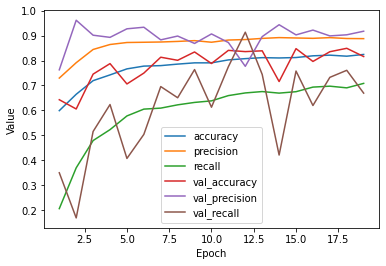

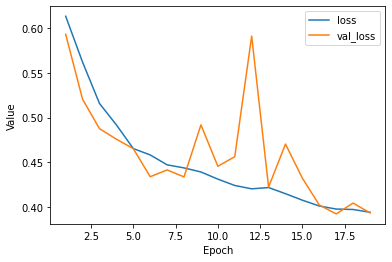

In [34]:
# The following variables are the hyperparameters.
loss = tf.keras.losses.BinaryCrossentropy()
activation = 'relu'
optimizer = tf.keras.optimizers.RMSprop
learning_rate = 0.001
epochs = 20
batch_size = 25
classification_threshold = 0.70
regularization = tf.keras.regularizers.l2
regularization_lambda = 0.001
label_name = "label"

list_of_hyperparameters = [learning_rate, epochs, batch_size,
                           classification_threshold,
                           regularization_lambda,
                           label_name]


# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(
          name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(
          thresholds=classification_threshold, name='precision'),
      tf.keras.metrics.Recall(
          thresholds=classification_threshold, name="recall"),
]

x_train1 = x_train.reshape(x_train.shape[0], 20, 431, 1)
x_val1 = x_val.reshape(x_val.shape[0], 20, 431, 1)

# Establish the model's topography.
my_model = create_model(learning_rate, METRICS, optimizer=optimizer, regularization=regularization, regularization_lambda=regularization_lambda)

# View the model's structure.
my_model.summary()

# Train the model on the training set.
epochs, hist = train_model(my_model, x_train1, y_train, epochs, 
                          label_name, batch_size, validation_data=(x_val1, y_val))

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall", 'val_accuracy', 'val_precision', 'val_recall'] 
plot_curve(epochs, hist, list_of_metrics_to_plot, dest_dir, filename, list_of_hyperparameters)
plot_curve(epochs, hist, ['loss', 'val_loss'], dest_dir, filename, list_of_hyperparameters)

training_performance =  my_model.evaluate(x_train1, y_train, verbose=0)
print('Training Performance')
print('---------------------------------')
print('loss: ', training_performance[0])
print('accuracy: ', training_performance[1])
print('precision: ', training_performance[2])
print('recall: ', training_performance[3])
print()

validation_performance =  my_model.evaluate(x_val1, y_val, verbose=0)
print('Validation Performance')
print('---------------------------------')
print('loss: ', validation_performance[0])
print('accuracy: ', validation_performance[1])
print('precision: ', validation_performance[2])
print('recall: ', validation_performance[3])

## Train 2
Neural Network Type:
* Input Layer: (Number of Nodes)
* Hidden Layer 1:
* Hidden Layer 2: 
* Ouput Layer: 

Hyper-parameters:
* Loss Function: 
* Activation Function: 
* Optimizer Function: 
* Learning Rate: 
* Epochs: 
* Batch_Size: 
* Classification Threshold: 
* Regularization: 
* Regularization Lambda: 

In [35]:
# Define the functions that create and train a model.
def create_model(my_learning_rate, my_metrics, optimizer, regularization, regularization_lambda):
    """Create and compile a simple classification model."""
    # Discard any pre-existing version of the model.
    model = None

    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, input_shape=(20, 431, 1), activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))

#     model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, activation=activation))
#     model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#     model.add(tf.keras.layers.Dropout(0.2))
#     model.add(tf.keras.layers.GlobalAveragePooling2D())

    model.add(tf.keras.layers.Flatten(name='Flatten_1'))

    # Implements L2 regularization in the first hidden layer.
    model.add(tf.keras.layers.Dense(units=20, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.01),
                                  name='Hidden1'))

    # Funnel the regression value through a sigmoid function.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid,
                                  name='Output'))

    # Call the compile method to construct the layers into a model that
    # TensorFlow can execute.  Notice that we're using a different loss
    # function for classification than for regression.    
    model.compile(optimizer=optimizer(lr=my_learning_rate),                                                   
                loss=loss,
                metrics=my_metrics)

    return model        
              
def train_model(model, features, label, epochs, label_name,
                batch_size=None, my_validation_split=0.0,
                validation_data=None, shuffle=True):
    """Feed a dataset into the model in order to train it."""

    # The x parameter of tf.keras.Model.fit can be a list of arrays.
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle, validation_data=validation_data)

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the classification metric for each epoch.
    hist = pd.DataFrame(history.history)

    return epochs, hist  

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 19, 430, 16)       80        
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 9, 215, 16)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 9, 215, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 214, 32)        2080      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 107, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 4, 107, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 3, 106, 64)      

350/350 [==============================] - 19s 55ms/step - loss: 0.4009 - accuracy: 0.8149 - precision: 0.8924 - recall: 0.6802 - val_loss: 0.4877 - val_accuracy: 0.8233 - val_precision: 0.8386 - val_recall: 0.7733
Epoch 29/100
350/350 [==============================] - 19s 55ms/step - loss: 0.3969 - accuracy: 0.8190 - precision: 0.9014 - recall: 0.6817 - val_loss: 0.3928 - val_accuracy: 0.8388 - val_precision: 0.8967 - val_recall: 0.7432
Epoch 30/100
350/350 [==============================] - 19s 55ms/step - loss: 0.3963 - accuracy: 0.8224 - precision: 0.8952 - recall: 0.6961 - val_loss: 0.4130 - val_accuracy: 0.8004 - val_precision: 0.9229 - val_recall: 0.6284
Epoch 31/100
350/350 [==============================] - 19s 53ms/step - loss: 0.3893 - accuracy: 0.8285 - precision: 0.9020 - recall: 0.7043 - val_loss: 0.3829 - val_accuracy: 0.8516 - val_precision: 0.8929 - val_recall: 0.7782
Epoch 32/100
350/350 [==============================] - 19s 53ms/step - loss: 0.3958 - accuracy: 0.82

Epoch 64/100
350/350 [==============================] - 20s 56ms/step - loss: 0.3659 - accuracy: 0.8410 - precision: 0.8975 - recall: 0.7394 - val_loss: 0.4564 - val_accuracy: 0.7408 - val_precision: 0.9529 - val_recall: 0.4728
Epoch 65/100
350/350 [==============================] - 20s 57ms/step - loss: 0.3688 - accuracy: 0.8396 - precision: 0.8914 - recall: 0.7424 - val_loss: 0.3725 - val_accuracy: 0.8686 - val_precision: 0.9085 - val_recall: 0.8016
Epoch 66/100
350/350 [==============================] - 21s 59ms/step - loss: 0.3659 - accuracy: 0.8443 - precision: 0.8939 - recall: 0.7513 - val_loss: 0.4014 - val_accuracy: 0.8677 - val_precision: 0.8744 - val_recall: 0.8395
Epoch 67/100
350/350 [==============================] - 21s 60ms/step - loss: 0.3600 - accuracy: 0.8448 - precision: 0.9014 - recall: 0.7446 - val_loss: 0.3802 - val_accuracy: 0.8315 - val_precision: 0.9231 - val_recall: 0.7004
Epoch 68/100
350/350 [==============================] - 20s 58ms/step - loss: 0.3684 - a

Epoch 100/100
350/350 [==============================] - 22s 62ms/step - loss: 0.3512 - accuracy: 0.8521 - precision: 0.9054 - recall: 0.7583 - val_loss: 0.3737 - val_accuracy: 0.8539 - val_precision: 0.9127 - val_recall: 0.7626
Training Performance
---------------------------------
loss:  0.3287157118320465
accuracy:  0.8824270367622375
precision:  0.9302526116371155
recall:  0.8052173852920532

Validation Performance
---------------------------------
loss:  0.37370309233665466
accuracy:  0.8539377450942993
precision:  0.9126891493797302
recall:  0.7626459002494812


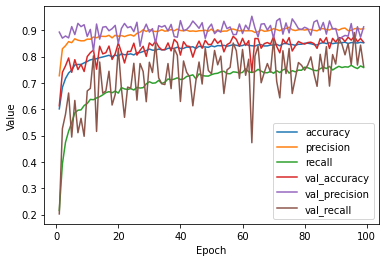

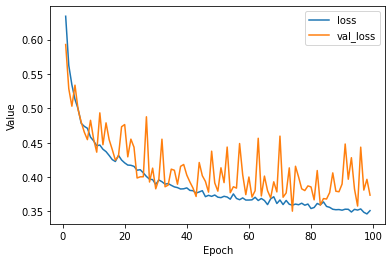

In [37]:
# The following variables are the hyperparameters.
loss = tf.keras.losses.BinaryCrossentropy()
activation = 'relu'
optimizer = tf.keras.optimizers.RMSprop
learning_rate = 0.001
epochs = 100
batch_size = 25
classification_threshold = 0.70
regularization = tf.keras.regularizers.l2
regularization_lambda = 0.001
label_name = "label"

list_of_hyperparameters = [learning_rate, epochs, batch_size,
                           classification_threshold,
                           regularization_lambda,
                           label_name]


# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(
          name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(
          thresholds=classification_threshold, name='precision'),
      tf.keras.metrics.Recall(
          thresholds=classification_threshold, name="recall"),
]

x_train1 = x_train.reshape(x_train.shape[0], 20, 431, 1)
x_val1 = x_val.reshape(x_val.shape[0], 20, 431, 1)

# Establish the model's topography.
my_model = create_model(learning_rate, METRICS, optimizer=optimizer, regularization=regularization, regularization_lambda=regularization_lambda)

# View the model's structure.
my_model.summary()

# Train the model on the training set.
epochs, hist = train_model(my_model, x_train1, y_train, epochs, 
                          label_name, batch_size, validation_data=(x_val1, y_val))

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall", 'val_accuracy', 'val_precision', 'val_recall'] 
plot_curve(epochs, hist, list_of_metrics_to_plot, dest_dir, filename, list_of_hyperparameters)
plot_curve(epochs, hist, ['loss', 'val_loss'], dest_dir, filename, list_of_hyperparameters)

training_performance =  my_model.evaluate(x_train1, y_train, verbose=0)
print('Training Performance')
print('---------------------------------')
print('loss: ', training_performance[0])
print('accuracy: ', training_performance[1])
print('precision: ', training_performance[2])
print('recall: ', training_performance[3])
print()

validation_performance =  my_model.evaluate(x_val1, y_val, verbose=0)
print('Validation Performance')
print('---------------------------------')
print('loss: ', validation_performance[0])
print('accuracy: ', validation_performance[1])
print('precision: ', validation_performance[2])
print('recall: ', validation_performance[3])

## Train 3
Neural Network Type:
* Input Layer: (Number of Nodes)
* Hidden Layer 1:
* Hidden Layer 2: 
* Ouput Layer: 

Hyper-parameters:
* Loss Function: 
* Activation Function: 
* Optimizer Function: 
* Learning Rate: 
* Epochs: 
* Batch_Size: 
* Classification Threshold: 
* Regularization: 
* Regularization Lambda: 

In [38]:
# Define the functions that create and train a model.
def create_model(my_learning_rate, my_metrics, optimizer, regularization, regularization_lambda):
    """Create and compile a simple classification model."""
    # Discard any pre-existing version of the model.
    model = None

    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, input_shape=(20, 431, 1), activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.4))

#     model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, activation=activation))
#     model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#     model.add(tf.keras.layers.Dropout(0.2))
#     model.add(tf.keras.layers.GlobalAveragePooling2D())

    model.add(tf.keras.layers.Flatten(name='Flatten_1'))

    # Implements L2 regularization in the first hidden layer.
    model.add(tf.keras.layers.Dense(units=20, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.01),
                                  name='Hidden1'))

    # Funnel the regression value through a sigmoid function.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid,
                                  name='Output'))

    # Call the compile method to construct the layers into a model that
    # TensorFlow can execute.  Notice that we're using a different loss
    # function for classification than for regression.    
    model.compile(optimizer=optimizer(lr=my_learning_rate),                                                   
                loss=loss,
                metrics=my_metrics)

    return model        
              
def train_model(model, features, label, epochs, label_name,
                batch_size=None, my_validation_split=0.0,
                validation_data=None, shuffle=True):
    """Feed a dataset into the model in order to train it."""

    # The x parameter of tf.keras.Model.fit can be a list of arrays.
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle, validation_data=validation_data)

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the classification metric for each epoch.
    hist = pd.DataFrame(history.history)

    return epochs, hist  

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 19, 430, 16)       80        
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 9, 215, 16)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 9, 215, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 214, 32)        2080      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 4, 107, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 4, 107, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 3, 106, 64)      

350/350 [==============================] - 20s 57ms/step - loss: 0.4469 - accuracy: 0.7899 - precision: 0.8628 - recall: 0.6470 - val_loss: 0.5453 - val_accuracy: 0.8265 - val_precision: 0.8539 - val_recall: 0.7617
Epoch 29/100
350/350 [==============================] - 22s 64ms/step - loss: 0.4478 - accuracy: 0.7892 - precision: 0.8590 - recall: 0.6492 - val_loss: 0.4957 - val_accuracy: 0.8210 - val_precision: 0.9037 - val_recall: 0.6936
Epoch 30/100
350/350 [==============================] - 21s 61ms/step - loss: 0.4401 - accuracy: 0.7952 - precision: 0.8692 - recall: 0.6539 - val_loss: 0.5275 - val_accuracy: 0.8008 - val_precision: 0.9170 - val_recall: 0.6342
Epoch 31/100
350/350 [==============================] - 22s 62ms/step - loss: 0.4423 - accuracy: 0.7920 - precision: 0.8627 - recall: 0.6524 - val_loss: 0.4450 - val_accuracy: 0.7921 - val_precision: 0.9147 - val_recall: 0.6158
Epoch 32/100
350/350 [==============================] - 21s 59ms/step - loss: 0.4388 - accuracy: 0.79

Epoch 64/100
350/350 [==============================] - 21s 59ms/step - loss: 0.4181 - accuracy: 0.8156 - precision: 0.8791 - recall: 0.6954 - val_loss: 0.6095 - val_accuracy: 0.8223 - val_precision: 0.7703 - val_recall: 0.8872
Epoch 65/100
350/350 [==============================] - 21s 60ms/step - loss: 0.4199 - accuracy: 0.8094 - precision: 0.8821 - recall: 0.6768 - val_loss: 0.5134 - val_accuracy: 0.8210 - val_precision: 0.9016 - val_recall: 0.6955
Epoch 66/100
350/350 [==============================] - 21s 61ms/step - loss: 0.4147 - accuracy: 0.8118 - precision: 0.8673 - recall: 0.6984 - val_loss: 0.4548 - val_accuracy: 0.7674 - val_precision: 0.9422 - val_recall: 0.5389
Epoch 67/100
350/350 [==============================] - 20s 59ms/step - loss: 0.4212 - accuracy: 0.8110 - precision: 0.8740 - recall: 0.6892 - val_loss: 0.5167 - val_accuracy: 0.8379 - val_precision: 0.8330 - val_recall: 0.8200
Epoch 68/100
350/350 [==============================] - 20s 57ms/step - loss: 0.4153 - a

Epoch 100/100
350/350 [==============================] - 21s 59ms/step - loss: 0.4038 - accuracy: 0.8271 - precision: 0.8936 - recall: 0.7093 - val_loss: 0.4570 - val_accuracy: 0.8187 - val_precision: 0.9093 - val_recall: 0.6829
Training Performance
---------------------------------
loss:  0.44471898674964905
accuracy:  0.8272467255592346
precision:  0.9165562987327576
recall:  0.6877018809318542

Validation Performance
---------------------------------
loss:  0.45702463388442993
accuracy:  0.8186812996864319
precision:  0.909326434135437
recall:  0.6828793883323669


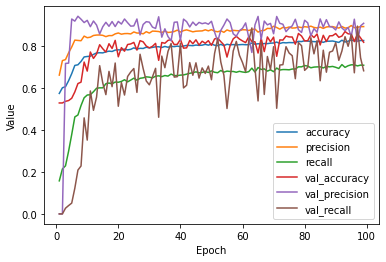

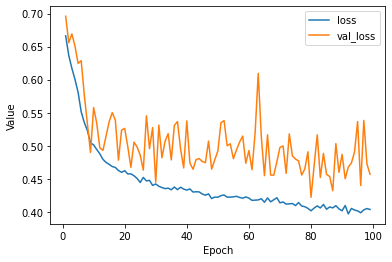

In [39]:
# The following variables are the hyperparameters.
loss = tf.keras.losses.BinaryCrossentropy()
activation = 'relu'
optimizer = tf.keras.optimizers.RMSprop
learning_rate = 0.001
epochs = 100
batch_size = 25
classification_threshold = 0.70
regularization = tf.keras.regularizers.l2
regularization_lambda = 0.001
label_name = "label"

list_of_hyperparameters = [learning_rate, epochs, batch_size,
                           classification_threshold,
                           regularization_lambda,
                           label_name]


# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(
          name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(
          thresholds=classification_threshold, name='precision'),
      tf.keras.metrics.Recall(
          thresholds=classification_threshold, name="recall"),
]

x_train1 = x_train.reshape(x_train.shape[0], 20, 431, 1)
x_val1 = x_val.reshape(x_val.shape[0], 20, 431, 1)

# Establish the model's topography.
my_model = create_model(learning_rate, METRICS, optimizer=optimizer, regularization=regularization, regularization_lambda=regularization_lambda)

# View the model's structure.
my_model.summary()

# Train the model on the training set.
epochs, hist = train_model(my_model, x_train1, y_train, epochs, 
                          label_name, batch_size, validation_data=(x_val1, y_val))

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall", 'val_accuracy', 'val_precision', 'val_recall'] 
plot_curve(epochs, hist, list_of_metrics_to_plot, dest_dir, filename, list_of_hyperparameters)
plot_curve(epochs, hist, ['loss', 'val_loss'], dest_dir, filename, list_of_hyperparameters)

training_performance =  my_model.evaluate(x_train1, y_train, verbose=0)
print('Training Performance')
print('---------------------------------')
print('loss: ', training_performance[0])
print('accuracy: ', training_performance[1])
print('precision: ', training_performance[2])
print('recall: ', training_performance[3])
print()

validation_performance =  my_model.evaluate(x_val1, y_val, verbose=0)
print('Validation Performance')
print('---------------------------------')
print('loss: ', validation_performance[0])
print('accuracy: ', validation_performance[1])
print('precision: ', validation_performance[2])
print('recall: ', validation_performance[3])

## Train 4
Neural Network Type:
* Input Layer: (Number of Nodes)
* Hidden Layer 1:
* Hidden Layer 2: 
* Ouput Layer: 

Hyper-parameters:
* Loss Function: 
* Activation Function: 
* Optimizer Function: 
* Learning Rate: 
* Epochs: 
* Batch_Size: 
* Classification Threshold: 
* Regularization: 
* Regularization Lambda: 

In [40]:
# Define the functions that create and train a model.
def create_model(my_learning_rate, my_metrics, optimizer, regularization, regularization_lambda):
    """Create and compile a simple classification model."""
    # Discard any pre-existing version of the model.
    model = None

    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, input_shape=(20, 431, 1), activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.4))

#     model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, activation=activation))
#     model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#     model.add(tf.keras.layers.Dropout(0.2))
#     model.add(tf.keras.layers.GlobalAveragePooling2D())

    model.add(tf.keras.layers.Flatten(name='Flatten_1'))

    # Implements L2 regularization in the first hidden layer.
    model.add(tf.keras.layers.Dense(units=20, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.1),
                                  name='Hidden1'))

    # Funnel the regression value through a sigmoid function.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid,
                                  name='Output'))

    # Call the compile method to construct the layers into a model that
    # TensorFlow can execute.  Notice that we're using a different loss
    # function for classification than for regression.    
    model.compile(optimizer=optimizer(lr=my_learning_rate),                                                   
                loss=loss,
                metrics=my_metrics)

    return model        
              
def train_model(model, features, label, epochs, label_name,
                batch_size=None, my_validation_split=0.0,
                validation_data=None, shuffle=True):
    """Feed a dataset into the model in order to train it."""

    # The x parameter of tf.keras.Model.fit can be a list of arrays.
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle, validation_data=validation_data)

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the classification metric for each epoch.
    hist = pd.DataFrame(history.history)

    return epochs, hist  

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 19, 430, 16)       80        
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 9, 215, 16)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 9, 215, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 8, 214, 32)        2080      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 4, 107, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 4, 107, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 3, 106, 64)      

350/350 [==============================] - 19s 55ms/step - loss: 0.4655 - accuracy: 0.7889 - precision: 0.8668 - recall: 0.6402 - val_loss: 0.4787 - val_accuracy: 0.8159 - val_precision: 0.8903 - val_recall: 0.6946
Epoch 29/100
350/350 [==============================] - 19s 55ms/step - loss: 0.4636 - accuracy: 0.7833 - precision: 0.8623 - recall: 0.6303 - val_loss: 0.5748 - val_accuracy: 0.8219 - val_precision: 0.8198 - val_recall: 0.7967
Epoch 30/100
350/350 [==============================] - 19s 55ms/step - loss: 0.4633 - accuracy: 0.7827 - precision: 0.8601 - recall: 0.6311 - val_loss: 0.5124 - val_accuracy: 0.8269 - val_precision: 0.8224 - val_recall: 0.8064
Epoch 31/100
350/350 [==============================] - 19s 55ms/step - loss: 0.4580 - accuracy: 0.7831 - precision: 0.8559 - recall: 0.6363 - val_loss: 0.5186 - val_accuracy: 0.8205 - val_precision: 0.8457 - val_recall: 0.7568
Epoch 32/100
350/350 [==============================] - 20s 57ms/step - loss: 0.4588 - accuracy: 0.78

Epoch 64/100
350/350 [==============================] - 19s 55ms/step - loss: 0.4463 - accuracy: 0.8031 - precision: 0.8702 - recall: 0.6730 - val_loss: 0.4880 - val_accuracy: 0.7875 - val_precision: 0.9123 - val_recall: 0.6070
Epoch 65/100
350/350 [==============================] - 21s 61ms/step - loss: 0.4412 - accuracy: 0.8040 - precision: 0.8763 - recall: 0.6691 - val_loss: 0.5478 - val_accuracy: 0.8338 - val_precision: 0.7982 - val_recall: 0.8658
Epoch 66/100
350/350 [==============================] - 20s 58ms/step - loss: 0.4453 - accuracy: 0.8022 - precision: 0.8774 - recall: 0.6634 - val_loss: 0.4638 - val_accuracy: 0.8182 - val_precision: 0.9019 - val_recall: 0.6887
Epoch 67/100
350/350 [==============================] - 19s 54ms/step - loss: 0.4442 - accuracy: 0.8008 - precision: 0.8750 - recall: 0.6624 - val_loss: 0.5269 - val_accuracy: 0.8333 - val_precision: 0.8281 - val_recall: 0.8152
Epoch 68/100
350/350 [==============================] - 20s 57ms/step - loss: 0.4398 - a

Epoch 100/100
350/350 [==============================] - 19s 53ms/step - loss: 0.4365 - accuracy: 0.8105 - precision: 0.8805 - recall: 0.6812 - val_loss: 0.6208 - val_accuracy: 0.8333 - val_precision: 0.7882 - val_recall: 0.8833
Training Performance
---------------------------------
loss:  0.6237097382545471
accuracy:  0.8293073773384094
precision:  0.77483731508255
recall:  0.8874534368515015

Validation Performance
---------------------------------
loss:  0.620759904384613
accuracy:  0.8333333134651184
precision:  0.7881944179534912
recall:  0.8832684755325317


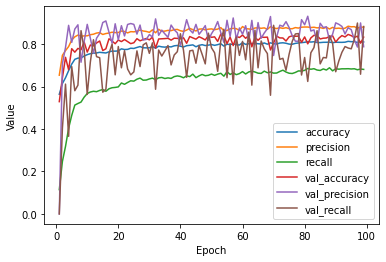

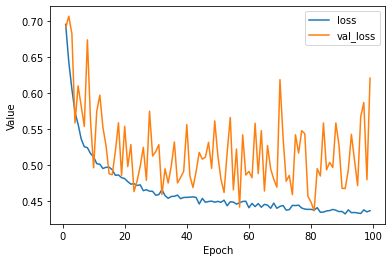

In [41]:
# The following variables are the hyperparameters.
loss = tf.keras.losses.BinaryCrossentropy()
activation = 'relu'
optimizer = tf.keras.optimizers.RMSprop
learning_rate = 0.001
epochs = 100
batch_size = 25
classification_threshold = 0.70
regularization = tf.keras.regularizers.l2
regularization_lambda = 0.001
label_name = "label"

list_of_hyperparameters = [learning_rate, epochs, batch_size,
                           classification_threshold,
                           regularization_lambda,
                           label_name]


# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(
          name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(
          thresholds=classification_threshold, name='precision'),
      tf.keras.metrics.Recall(
          thresholds=classification_threshold, name="recall"),
]

x_train1 = x_train.reshape(x_train.shape[0], 20, 431, 1)
x_val1 = x_val.reshape(x_val.shape[0], 20, 431, 1)

# Establish the model's topography.
my_model = create_model(learning_rate, METRICS, optimizer=optimizer, regularization=regularization, regularization_lambda=regularization_lambda)

# View the model's structure.
my_model.summary()

# Train the model on the training set.
epochs, hist = train_model(my_model, x_train1, y_train, epochs, 
                          label_name, batch_size, validation_data=(x_val1, y_val))

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall", 'val_accuracy', 'val_precision', 'val_recall'] 
plot_curve(epochs, hist, list_of_metrics_to_plot, dest_dir, filename, list_of_hyperparameters)
plot_curve(epochs, hist, ['loss', 'val_loss'], dest_dir, filename, list_of_hyperparameters)

training_performance =  my_model.evaluate(x_train1, y_train, verbose=0)
print('Training Performance')
print('---------------------------------')
print('loss: ', training_performance[0])
print('accuracy: ', training_performance[1])
print('precision: ', training_performance[2])
print('recall: ', training_performance[3])
print()

validation_performance =  my_model.evaluate(x_val1, y_val, verbose=0)
print('Validation Performance')
print('---------------------------------')
print('loss: ', validation_performance[0])
print('accuracy: ', validation_performance[1])
print('precision: ', validation_performance[2])
print('recall: ', validation_performance[3])

## Train 5
Neural Network Type:
* Input Layer: (Number of Nodes)
* Hidden Layer 1:
* Hidden Layer 2: 
* Ouput Layer: 

Hyper-parameters:
* Loss Function: 
* Activation Function: 
* Optimizer Function: 
* Learning Rate: 
* Epochs: 
* Batch_Size: 
* Classification Threshold: 
* Regularization: 
* Regularization Lambda: 

In [48]:
# Define the functions that create and train a model.
def create_model(my_learning_rate, my_metrics, optimizer, regularization, regularization_lambda):
    """Create and compile a simple classification model."""
    # Discard any pre-existing version of the model.
    model = None

    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, input_shape=(20, 431, 1), activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Flatten(name='Flatten_1'))

    # Implements L2 regularization in the first hidden layer.
    model.add(tf.keras.layers.Dense(units=200, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.1),
                                  name='Hidden1'))

    # Funnel the regression value through a sigmoid function.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid,
                                  name='Output'))

    # Call the compile method to construct the layers into a model that
    # TensorFlow can execute.  Notice that we're using a different loss
    # function for classification than for regression.    
    model.compile(optimizer=optimizer(lr=my_learning_rate),                                                   
                loss=loss,
                metrics=my_metrics)

    return model        
              
def train_model(model, features, label, epochs, label_name,
                batch_size=None, my_validation_split=0.0,
                validation_data=None, shuffle=True):
    """Feed a dataset into the model in order to train it."""

    # The x parameter of tf.keras.Model.fit can be a list of arrays.
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle, validation_data=validation_data)

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the classification metric for each epoch.
    hist = pd.DataFrame(history.history)

    return epochs, hist  

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 19, 430, 16)       80        
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 9, 215, 16)        0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 9, 215, 16)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 8, 214, 32)        2080      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 4, 107, 32)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 4, 107, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 3, 106, 64)      

350/350 [==============================] - 23s 66ms/step - loss: 0.5023 - accuracy: 0.7708 - precision: 0.8609 - recall: 0.5995 - val_loss: 0.4932 - val_accuracy: 0.7862 - val_precision: 0.9095 - val_recall: 0.6060
Epoch 29/100
350/350 [==============================] - 21s 61ms/step - loss: 0.4887 - accuracy: 0.7819 - precision: 0.8638 - recall: 0.6253 - val_loss: 0.5295 - val_accuracy: 0.8242 - val_precision: 0.8361 - val_recall: 0.7792
Epoch 30/100
350/350 [==============================] - 21s 61ms/step - loss: 0.4964 - accuracy: 0.7818 - precision: 0.8655 - recall: 0.6234 - val_loss: 0.5214 - val_accuracy: 0.8260 - val_precision: 0.8649 - val_recall: 0.7471
Epoch 31/100
350/350 [==============================] - 21s 61ms/step - loss: 0.4934 - accuracy: 0.7801 - precision: 0.8645 - recall: 0.6199 - val_loss: 0.5431 - val_accuracy: 0.8077 - val_precision: 0.8585 - val_recall: 0.7082
Epoch 32/100
350/350 [==============================] - 21s 61ms/step - loss: 0.4915 - accuracy: 0.78

Epoch 64/100
350/350 [==============================] - 22s 62ms/step - loss: 0.4837 - accuracy: 0.7900 - precision: 0.8675 - recall: 0.6425 - val_loss: 0.5291 - val_accuracy: 0.8246 - val_precision: 0.8928 - val_recall: 0.7130
Epoch 65/100
350/350 [==============================] - 23s 66ms/step - loss: 0.4820 - accuracy: 0.7927 - precision: 0.8688 - recall: 0.6480 - val_loss: 0.5245 - val_accuracy: 0.8265 - val_precision: 0.8726 - val_recall: 0.7393
Epoch 66/100
350/350 [==============================] - 24s 68ms/step - loss: 0.4785 - accuracy: 0.7983 - precision: 0.8701 - recall: 0.6609 - val_loss: 0.5128 - val_accuracy: 0.7866 - val_precision: 0.9132 - val_recall: 0.6041
Epoch 67/100
350/350 [==============================] - 25s 72ms/step - loss: 0.4813 - accuracy: 0.7940 - precision: 0.8753 - recall: 0.6450 - val_loss: 0.5627 - val_accuracy: 0.8338 - val_precision: 0.8410 - val_recall: 0.7977
Epoch 68/100
350/350 [==============================] - 25s 71ms/step - loss: 0.4795 - a

Epoch 100/100
350/350 [==============================] - 25s 71ms/step - loss: 0.4719 - accuracy: 0.8097 - precision: 0.8762 - recall: 0.6837 - val_loss: 0.5204 - val_accuracy: 0.7866 - val_precision: 0.9108 - val_recall: 0.6060
Training Performance
---------------------------------
loss:  0.5095080137252808
accuracy:  0.7878649234771729
precision:  0.9058296084403992
recall:  0.6022360324859619

Validation Performance
---------------------------------
loss:  0.5204139947891235
accuracy:  0.7866300344467163
precision:  0.9108186960220337
recall:  0.6060311198234558


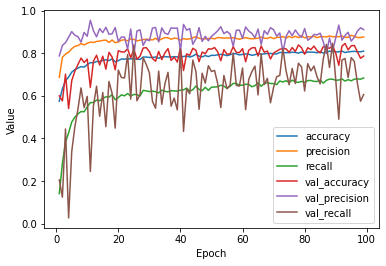

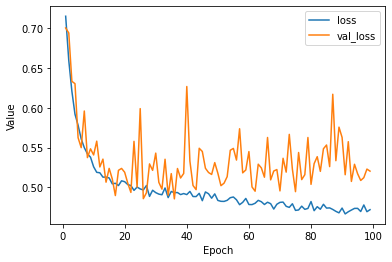

In [49]:
# The following variables are the hyperparameters.
loss = tf.keras.losses.BinaryCrossentropy()
activation = 'relu'
optimizer = tf.keras.optimizers.RMSprop
learning_rate = 0.001
epochs = 100
batch_size = 25
classification_threshold = 0.70
regularization = tf.keras.regularizers.l2
regularization_lambda = 0.001
label_name = "label"

list_of_hyperparameters = [learning_rate, epochs, batch_size,
                           classification_threshold,
                           regularization_lambda,
                           label_name]


# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(
          name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(
          thresholds=classification_threshold, name='precision'),
      tf.keras.metrics.Recall(
          thresholds=classification_threshold, name="recall"),
]

x_train1 = x_train.reshape(x_train.shape[0], 20, 431, 1)
x_val1 = x_val.reshape(x_val.shape[0], 20, 431, 1)

# Establish the model's topography.
my_model = create_model(learning_rate, METRICS, optimizer=optimizer, regularization=regularization, regularization_lambda=regularization_lambda)

# View the model's structure.
my_model.summary()

# Train the model on the training set.
epochs, hist = train_model(my_model, x_train1, y_train, epochs, 
                          label_name, batch_size, validation_data=(x_val1, y_val))

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall", 'val_accuracy', 'val_precision', 'val_recall'] 
plot_curve(epochs, hist, list_of_metrics_to_plot, dest_dir, filename, list_of_hyperparameters)
plot_curve(epochs, hist, ['loss', 'val_loss'], dest_dir, filename, list_of_hyperparameters)

training_performance =  my_model.evaluate(x_train1, y_train, verbose=0)
print('Training Performance')
print('---------------------------------')
print('loss: ', training_performance[0])
print('accuracy: ', training_performance[1])
print('precision: ', training_performance[2])
print('recall: ', training_performance[3])
print()

validation_performance =  my_model.evaluate(x_val1, y_val, verbose=0)
print('Validation Performance')
print('---------------------------------')
print('loss: ', validation_performance[0])
print('accuracy: ', validation_performance[1])
print('precision: ', validation_performance[2])
print('recall: ', validation_performance[3])

## Train 6
Neural Network Type:
* Input Layer: (Number of Nodes)
* Hidden Layer 1:
* Hidden Layer 2: 
* Ouput Layer: 

Hyper-parameters:
* Loss Function: 
* Activation Function: 
* Optimizer Function: 
* Learning Rate: 
* Epochs: 
* Batch_Size: 
* Classification Threshold: 
* Regularization: 
* Regularization Lambda: 

In [50]:
# Define the functions that create and train a model.
def create_model(my_learning_rate, my_metrics, optimizer, regularization, regularization_lambda):
    """Create and compile a simple classification model."""
    # Discard any pre-existing version of the model.
    model = None

    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, input_shape=(20, 431, 1), activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Flatten(name='Flatten_1'))

    # Implements L2 regularization in the first hidden layer.
    model.add(tf.keras.layers.Dense(units=3392, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.1),
                                  name='Hidden1'))
    
    # Implements L2 regularization in the first hidden layer.
    model.add(tf.keras.layers.Dense(units=20, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.1),
                                  name='Hidden2'))

    # Funnel the regression value through a sigmoid function.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid,
                                  name='Output'))

    # Call the compile method to construct the layers into a model that
    # TensorFlow can execute.  Notice that we're using a different loss
    # function for classification than for regression.    
    model.compile(optimizer=optimizer(lr=my_learning_rate),                                                   
                loss=loss,
                metrics=my_metrics)

    return model        
              
def train_model(model, features, label, epochs, label_name,
                batch_size=None, my_validation_split=0.0,
                validation_data=None, shuffle=True):
    """Feed a dataset into the model in order to train it."""

    # The x parameter of tf.keras.Model.fit can be a list of arrays.
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle, validation_data=validation_data)

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the classification metric for each epoch.
    hist = pd.DataFrame(history.history)

    return epochs, hist  

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 19, 430, 16)       80        
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 9, 215, 16)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 9, 215, 16)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 8, 214, 32)        2080      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 4, 107, 32)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 4, 107, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 3, 106, 64)      

Epoch 28/100
350/350 [==============================] - 64s 184ms/step - loss: 0.7405 - accuracy: 0.8094 - precision: 0.8524 - recall: 0.7091 - val_loss: 0.7191 - val_accuracy: 0.8425 - val_precision: 0.8654 - val_recall: 0.7879
Epoch 29/100
350/350 [==============================] - 64s 183ms/step - loss: 0.7346 - accuracy: 0.8158 - precision: 0.8687 - recall: 0.7071 - val_loss: 0.8077 - val_accuracy: 0.8429 - val_precision: 0.8415 - val_recall: 0.8210
Epoch 30/100
350/350 [==============================] - 64s 183ms/step - loss: 0.7371 - accuracy: 0.8129 - precision: 0.8585 - recall: 0.7113 - val_loss: 0.7360 - val_accuracy: 0.8484 - val_precision: 0.8531 - val_recall: 0.8191
Epoch 31/100
350/350 [==============================] - 64s 183ms/step - loss: 0.7354 - accuracy: 0.8141 - precision: 0.8604 - recall: 0.7120 - val_loss: 0.7235 - val_accuracy: 0.8031 - val_precision: 0.9164 - val_recall: 0.6401
Epoch 32/100
350/350 [==============================] - 64s 183ms/step - loss: 0.734

Epoch 64/100
350/350 [==============================] - 64s 183ms/step - loss: 0.6888 - accuracy: 0.8331 - precision: 0.8783 - recall: 0.7404 - val_loss: 0.6727 - val_accuracy: 0.8027 - val_precision: 0.9198 - val_recall: 0.6362
Epoch 65/100
350/350 [==============================] - 64s 184ms/step - loss: 0.6975 - accuracy: 0.8288 - precision: 0.8819 - recall: 0.7257 - val_loss: 0.6623 - val_accuracy: 0.8585 - val_precision: 0.8929 - val_recall: 0.7947
Epoch 66/100
350/350 [==============================] - 88s 252ms/step - loss: 0.6978 - accuracy: 0.8319 - precision: 0.8806 - recall: 0.7349 - val_loss: 0.6693 - val_accuracy: 0.8370 - val_precision: 0.9138 - val_recall: 0.7218
Epoch 67/100
350/350 [==============================] - 65s 186ms/step - loss: 0.6990 - accuracy: 0.8300 - precision: 0.8775 - recall: 0.7334 - val_loss: 0.7294 - val_accuracy: 0.8512 - val_precision: 0.8282 - val_recall: 0.8628
Epoch 68/100
350/350 [==============================] - 63s 181ms/step - loss: 0.700

Epoch 100/100
350/350 [==============================] - 70s 199ms/step - loss: 0.6820 - accuracy: 0.8441 - precision: 0.8876 - recall: 0.7575 - val_loss: 0.6688 - val_accuracy: 0.8448 - val_precision: 0.9166 - val_recall: 0.7374
Training Performance
---------------------------------
loss:  0.6504468321800232
accuracy:  0.8519747853279114
precision:  0.9182485938072205
recall:  0.7450931668281555

Validation Performance
---------------------------------
loss:  0.6688079833984375
accuracy:  0.8447802066802979
precision:  0.9165658950805664
recall:  0.7373540997505188


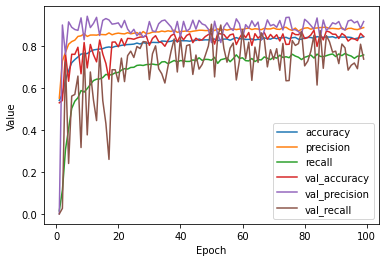

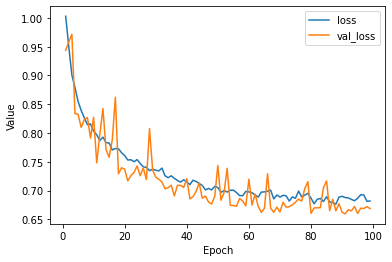

In [51]:
# The following variables are the hyperparameters.
loss = tf.keras.losses.BinaryCrossentropy()
activation = 'relu'
optimizer = tf.keras.optimizers.RMSprop
learning_rate = 0.001
epochs = 100
batch_size = 25
classification_threshold = 0.70
regularization = tf.keras.regularizers.l2
regularization_lambda = 0.001
label_name = "label"

list_of_hyperparameters = [learning_rate, epochs, batch_size,
                           classification_threshold,
                           regularization_lambda,
                           label_name]


# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(
          name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(
          thresholds=classification_threshold, name='precision'),
      tf.keras.metrics.Recall(
          thresholds=classification_threshold, name="recall"),
]

x_train1 = x_train.reshape(x_train.shape[0], 20, 431, 1)
x_val1 = x_val.reshape(x_val.shape[0], 20, 431, 1)

# Establish the model's topography.
my_model = create_model(learning_rate, METRICS, optimizer=optimizer, regularization=regularization, regularization_lambda=regularization_lambda)

# View the model's structure.
my_model.summary()

# Train the model on the training set.
epochs, hist = train_model(my_model, x_train1, y_train, epochs, 
                          label_name, batch_size, validation_data=(x_val1, y_val))

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall", 'val_accuracy', 'val_precision', 'val_recall'] 
plot_curve(epochs, hist, list_of_metrics_to_plot, dest_dir, filename, list_of_hyperparameters)
plot_curve(epochs, hist, ['loss', 'val_loss'], dest_dir, filename, list_of_hyperparameters)

training_performance =  my_model.evaluate(x_train1, y_train, verbose=0)
print('Training Performance')
print('---------------------------------')
print('loss: ', training_performance[0])
print('accuracy: ', training_performance[1])
print('precision: ', training_performance[2])
print('recall: ', training_performance[3])
print()

validation_performance =  my_model.evaluate(x_val1, y_val, verbose=0)
print('Validation Performance')
print('---------------------------------')
print('loss: ', validation_performance[0])
print('accuracy: ', validation_performance[1])
print('precision: ', validation_performance[2])
print('recall: ', validation_performance[3])